In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from mpl_toolkits import mplot3d


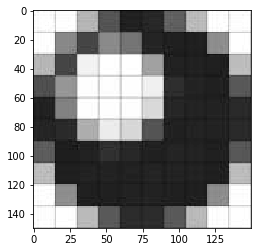

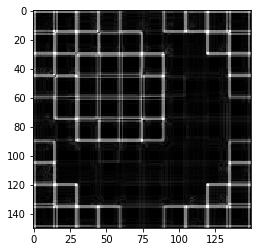

In [2]:

# paisagem = np.array([[0,0,0,0],[100,100,100,100],[200,200,200,200],[300,303,302,301]])
# paisagem = cv2.imread('paisagem.jpg', 0)
paisagem = cv2.imread('low.jpg', 0)
# ?paisagem
plt.imshow(paisagem, 'gray'); plt.show()

# print(paisagem, "\n")
# print(paisagem[3, 3])

# paisagem = np.zeros(shape=(5,2))

ddepth = cv2.CV_32F
dx = cv2.Sobel(paisagem, ddepth, 1, 0)
dy = cv2.Sobel(paisagem, ddepth, 0, 1)
dxabs = cv2.convertScaleAbs(dx)
dyabs = cv2.convertScaleAbs(dy)
gradient = cv2.addWeighted(dxabs, 0.5, dyabs, 0.5, 0)
plt.imshow(gradient, 'gray'); plt.show()

In [9]:
print(paisagem.shape)

(150, 150)


In [8]:
# seam = gradient.copy()

rows = paisagem.shape[0]
cols = paisagem.shape[1]
seam = np.zeros((rows,cols))

cont=0
for i in range(rows):
    for j in range(cols):
        if(i == 0):
            seam[i,j] = gradient[i,j]
        if (i > 0 and i < rows):
#             print("sou: ", seam[i,j], "na posição: [ ", i, " , ", j, " ]\n")
            if(j == 0):
                seam[i,j] = gradient[i,j] + max(seam[i-1,j], seam[i-1,j+1])
#                 print("peguei o : ", seam[i-1,j], " j e ", seam[i-1,j+1], " j+1 e o max é: ", max(seam[i-1,j], seam[i-1,j+1]), "\n")
            elif( j > 0 and j < cols-1):
                lero = (max(seam[i-1,j], seam[i-1,j+1], seam[i-1,j-1]))
#                 print("peguei o : ", seam[i-1,j-1], " j-1 ", seam[i-1,j], " j e ", seam[i-1,j+1], " j+1 e o max é: ", lero, "\n")
                seam[i,j] = gradient[i,j] + lero
#                 print("Teste : ", seam[i,j], "\n")
            else: # j == cols
                seam[i,j] = gradient[i,j] + max(seam[i-1,j], seam[i-1,j-1])
#                 print("peguei o : ", seam[i-1,j-1], " j-1 ", seam[i-1,j], " j \n")
                
#             print("ficou: ", seam[i,j], "na posição: [ ", i, " , ", j, " ]\n")
# plt.imshow(seam, "gray"); plt.show()
# plt.imshow(gradient, "gray"); plt.show()
# print(gradient,"\n")

# print(seam)
 

(150, 150)
sou:  0.0 na posição: [  1  ,  0  ]

peguei o :  0.0  j e  82.0  j+1 e o max é:  82.0 

ficou:  164.0 na posição: [  1  ,  0  ]

sou:  0.0 na posição: [  1  ,  1  ]

peguei o :  0.0  j-1  82.0  j e  37.0  j+1 e o max é:  82.0 

Teste :  278.0 

ficou:  278.0 na posição: [  1  ,  1  ]

sou:  0.0 na posição: [  1  ,  2  ]

peguei o :  82.0  j-1  37.0  j e  4.0  j+1 e o max é:  82.0 

Teste :  233.0 

ficou:  233.0 na posição: [  1  ,  2  ]

sou:  0.0 na posição: [  1  ,  3  ]

peguei o :  37.0  j-1  4.0  j e  28.0  j+1 e o max é:  37.0 

Teste :  168.0 

ficou:  168.0 na posição: [  1  ,  3  ]

sou:  0.0 na posição: [  1  ,  4  ]

peguei o :  4.0  j-1  28.0  j e  3.0  j+1 e o max é:  28.0 

Teste :  176.0 

ficou:  176.0 na posição: [  1  ,  4  ]

sou:  0.0 na posição: [  1  ,  5  ]

peguei o :  28.0  j-1  3.0  j e  12.0  j+1 e o max é:  28.0 

Teste :  153.0 

ficou:  153.0 na posição: [  1  ,  5  ]

sou:  0.0 na posição: [  1  ,  6  ]

peguei o :  3.0  j-1  12.0  j e  8.0  j


Teste :  54.0 

ficou:  54.0 na posição: [  1  ,  53  ]

sou:  0.0 na posição: [  1  ,  54  ]

peguei o :  0.0  j-1  0.0  j e  9.0  j+1 e o max é:  9.0 

Teste :  63.0 

ficou:  63.0 na posição: [  1  ,  54  ]

sou:  0.0 na posição: [  1  ,  55  ]

peguei o :  0.0  j-1  9.0  j e  6.0  j+1 e o max é:  9.0 

Teste :  72.0 

ficou:  72.0 na posição: [  1  ,  55  ]

sou:  0.0 na posição: [  1  ,  56  ]

peguei o :  9.0  j-1  6.0  j e  9.0  j+1 e o max é:  9.0 

Teste :  60.0 

ficou:  60.0 na posição: [  1  ,  56  ]

sou:  0.0 na posição: [  1  ,  57  ]

peguei o :  6.0  j-1  9.0  j e  25.0  j+1 e o max é:  25.0 

Teste :  77.0 

ficou:  77.0 na posição: [  1  ,  57  ]

sou:  0.0 na posição: [  1  ,  58  ]

peguei o :  9.0  j-1  25.0  j e  102.0  j+1 e o max é:  102.0 

Teste :  170.0 

ficou:  170.0 na posição: [  1  ,  58  ]

sou:  0.0 na posição: [  1  ,  59  ]

peguei o :  25.0  j-1  102.0  j e  70.0  j+1 e o max é:  102.0 

Teste :  244.0 

ficou:  244.0 na posição: [  1  ,  59  ]

s

peguei o :  9.0  j-1  6.0  j e  4.0  j+1 e o max é:  9.0 

Teste :  107.0 

ficou:  107.0 na posição: [  1  ,  115  ]

sou:  0.0 na posição: [  1  ,  116  ]

peguei o :  6.0  j-1  4.0  j e  2.0  j+1 e o max é:  6.0 

Teste :  102.0 

ficou:  102.0 na posição: [  1  ,  116  ]

sou:  0.0 na posição: [  1  ,  117  ]

peguei o :  4.0  j-1  2.0  j e  55.0  j+1 e o max é:  55.0 

Teste :  149.0 

ficou:  149.0 na posição: [  1  ,  117  ]

sou:  0.0 na posição: [  1  ,  118  ]

peguei o :  2.0  j-1  55.0  j e  80.0  j+1 e o max é:  80.0 

Teste :  227.0 

ficou:  227.0 na posição: [  1  ,  118  ]

sou:  0.0 na posição: [  1  ,  119  ]

peguei o :  55.0  j-1  80.0  j e  128.0  j+1 e o max é:  128.0 

Teste :  325.0 

ficou:  325.0 na posição: [  1  ,  119  ]

sou:  0.0 na posição: [  1  ,  120  ]

peguei o :  80.0  j-1  128.0  j e  39.0  j+1 e o max é:  128.0 

Teste :  382.0 

ficou:  382.0 na posição: [  1  ,  120  ]

sou:  0.0 na posição: [  1  ,  121  ]

peguei o :  128.0  j-1  39.0  j e  

sou:  0.0 na posição: [  2  ,  33  ]

peguei o :  154.0  j-1  101.0  j e  92.0  j+1 e o max é:  154.0 

Teste :  160.0 

ficou:  160.0 na posição: [  2  ,  33  ]

sou:  0.0 na posição: [  2  ,  34  ]

peguei o :  101.0  j-1  92.0  j e  92.0  j+1 e o max é:  101.0 

Teste :  107.0 

ficou:  107.0 na posição: [  2  ,  34  ]

sou:  0.0 na posição: [  2  ,  35  ]

peguei o :  92.0  j-1  92.0  j e  92.0  j+1 e o max é:  92.0 

Teste :  98.0 

ficou:  98.0 na posição: [  2  ,  35  ]

sou:  0.0 na posição: [  2  ,  36  ]

peguei o :  92.0  j-1  92.0  j e  92.0  j+1 e o max é:  92.0 

Teste :  98.0 

ficou:  98.0 na posição: [  2  ,  36  ]

sou:  0.0 na posição: [  2  ,  37  ]

peguei o :  92.0  j-1  92.0  j e  98.0  j+1 e o max é:  98.0 

Teste :  104.0 

ficou:  104.0 na posição: [  2  ,  37  ]

sou:  0.0 na posição: [  2  ,  38  ]

peguei o :  92.0  j-1  98.0  j e  105.0  j+1 e o max é:  105.0 

Teste :  111.0 

ficou:  111.0 na posição: [  2  ,  38  ]

sou:  0.0 na posição: [  2  ,  39  ]


peguei o :  30.0  j-1  30.0  j e  30.0  j+1 e o max é:  30.0 

Teste :  32.0 

ficou:  32.0 na posição: [  2  ,  84  ]

sou:  0.0 na posição: [  2  ,  85  ]

peguei o :  30.0  j-1  30.0  j e  33.0  j+1 e o max é:  33.0 

Teste :  35.0 

ficou:  35.0 na posição: [  2  ,  85  ]

sou:  0.0 na posição: [  2  ,  86  ]

peguei o :  30.0  j-1  33.0  j e  40.0  j+1 e o max é:  40.0 

Teste :  42.0 

ficou:  42.0 na posição: [  2  ,  86  ]

sou:  0.0 na posição: [  2  ,  87  ]

peguei o :  33.0  j-1  40.0  j e  120.0  j+1 e o max é:  120.0 

Teste :  123.0 

ficou:  123.0 na posição: [  2  ,  87  ]

sou:  0.0 na posição: [  2  ,  88  ]

peguei o :  40.0  j-1  120.0  j e  238.0  j+1 e o max é:  238.0 

Teste :  248.0 

ficou:  248.0 na posição: [  2  ,  88  ]

sou:  0.0 na posição: [  2  ,  89  ]

peguei o :  120.0  j-1  238.0  j e  277.0  j+1 e o max é:  277.0 

Teste :  369.0 

ficou:  369.0 na posição: [  2  ,  89  ]

sou:  0.0 na posição: [  2  ,  90  ]

peguei o :  238.0  j-1  277.0  j e  1

peguei o :  135.0  j-1  138.0  j e  139.0  j+1 e o max é:  139.0 

Teste :  151.0 

ficou:  151.0 na posição: [  2  ,  143  ]

sou:  0.0 na posição: [  2  ,  144  ]

peguei o :  138.0  j-1  139.0  j e  150.0  j+1 e o max é:  150.0 

Teste :  162.0 

ficou:  162.0 na posição: [  2  ,  144  ]

sou:  0.0 na posição: [  2  ,  145  ]

peguei o :  139.0  j-1  150.0  j e  157.0  j+1 e o max é:  157.0 

Teste :  165.0 

ficou:  165.0 na posição: [  2  ,  145  ]

sou:  0.0 na posição: [  2  ,  146  ]

peguei o :  150.0  j-1  157.0  j e  206.0  j+1 e o max é:  206.0 

Teste :  212.0 

ficou:  212.0 na posição: [  2  ,  146  ]

sou:  0.0 na posição: [  2  ,  147  ]

peguei o :  157.0  j-1  206.0  j e  247.0  j+1 e o max é:  247.0 

Teste :  251.0 

ficou:  251.0 na posição: [  2  ,  147  ]

sou:  0.0 na posição: [  2  ,  148  ]

peguei o :  206.0  j-1  247.0  j e  171.0  j+1 e o max é:  247.0 

Teste :  342.0 

ficou:  342.0 na posição: [  2  ,  148  ]

sou:  0.0 na posição: [  2  ,  149  ]

pegu

ficou:  101.0 na posição: [  3  ,  55  ]

sou:  0.0 na posição: [  3  ,  56  ]

peguei o :  83.0  j-1  94.0  j e  191.0  j+1 e o max é:  191.0 

Teste :  204.0 

ficou:  204.0 na posição: [  3  ,  56  ]

sou:  0.0 na posição: [  3  ,  57  ]

peguei o :  94.0  j-1  191.0  j e  286.0  j+1 e o max é:  286.0 

Teste :  294.0 

ficou:  294.0 na posição: [  3  ,  57  ]

sou:  0.0 na posição: [  3  ,  58  ]

peguei o :  191.0  j-1  286.0  j e  360.0  j+1 e o max é:  360.0 

Teste :  399.0 

ficou:  399.0 na posição: [  3  ,  58  ]

sou:  0.0 na posição: [  3  ,  59  ]

peguei o :  286.0  j-1  360.0  j e  324.0  j+1 e o max é:  360.0 

Teste :  480.0 

ficou:  480.0 na posição: [  3  ,  59  ]

sou:  0.0 na posição: [  3  ,  60  ]

peguei o :  360.0  j-1  324.0  j e  221.0  j+1 e o max é:  360.0 

Teste :  451.0 

ficou:  451.0 na posição: [  3  ,  60  ]

sou:  0.0 na posição: [  3  ,  61  ]

peguei o :  324.0  j-1  221.0  j e  123.0  j+1 e o max é:  324.0 

Teste :  348.0 

ficou:  348.0 na po

peguei o :  130.0  j-1  124.0  j e  118.0  j+1 e o max é:  130.0 

Teste :  138.0 

ficou:  138.0 na posição: [  3  ,  111  ]

sou:  0.0 na posição: [  3  ,  112  ]

peguei o :  124.0  j-1  118.0  j e  116.0  j+1 e o max é:  124.0 

Teste :  128.0 

ficou:  128.0 na posição: [  3  ,  112  ]

sou:  0.0 na posição: [  3  ,  113  ]

peguei o :  118.0  j-1  116.0  j e  124.0  j+1 e o max é:  124.0 

Teste :  130.0 

ficou:  130.0 na posição: [  3  ,  113  ]

sou:  0.0 na posição: [  3  ,  114  ]

peguei o :  116.0  j-1  124.0  j e  121.0  j+1 e o max é:  124.0 

Teste :  138.0 

ficou:  138.0 na posição: [  3  ,  114  ]

sou:  0.0 na posição: [  3  ,  115  ]

peguei o :  124.0  j-1  121.0  j e  158.0  j+1 e o max é:  158.0 

Teste :  168.0 

ficou:  168.0 na posição: [  3  ,  115  ]

sou:  0.0 na posição: [  3  ,  116  ]

peguei o :  121.0  j-1  158.0  j e  234.0  j+1 e o max é:  234.0 

Teste :  242.0 

ficou:  242.0 na posição: [  3  ,  116  ]

sou:  0.0 na posição: [  3  ,  117  ]

pegu

sou:  0.0 na posição: [  4  ,  22  ]

peguei o :  134.0  j-1  135.0  j e  137.0  j+1 e o max é:  137.0 

Teste :  139.0 

ficou:  139.0 na posição: [  4  ,  22  ]

sou:  0.0 na posição: [  4  ,  23  ]

peguei o :  135.0  j-1  137.0  j e  144.0  j+1 e o max é:  144.0 

Teste :  146.0 

ficou:  146.0 na posição: [  4  ,  23  ]

sou:  0.0 na posição: [  4  ,  24  ]

peguei o :  137.0  j-1  144.0  j e  161.0  j+1 e o max é:  161.0 

Teste :  163.0 

ficou:  163.0 na posição: [  4  ,  24  ]

sou:  0.0 na posição: [  4  ,  25  ]

peguei o :  144.0  j-1  161.0  j e  282.0  j+1 e o max é:  282.0 

Teste :  285.0 

ficou:  285.0 na posição: [  4  ,  25  ]

sou:  0.0 na posição: [  4  ,  26  ]

peguei o :  161.0  j-1  282.0  j e  411.0  j+1 e o max é:  411.0 

Teste :  417.0 

ficou:  417.0 na posição: [  4  ,  26  ]

sou:  0.0 na posição: [  4  ,  27  ]

peguei o :  282.0  j-1  411.0  j e  549.0  j+1 e o max é:  549.0 

Teste :  559.0 

ficou:  559.0 na posição: [  4  ,  27  ]

sou:  0.0 na pos

peguei o :  56.0  j-1  49.0  j e  45.0  j+1 e o max é:  56.0 

Teste :  62.0 

ficou:  62.0 na posição: [  4  ,  82  ]

sou:  0.0 na posição: [  4  ,  83  ]

peguei o :  49.0  j-1  45.0  j e  47.0  j+1 e o max é:  49.0 

Teste :  55.0 

ficou:  55.0 na posição: [  4  ,  83  ]

sou:  0.0 na posição: [  4  ,  84  ]

peguei o :  45.0  j-1  47.0  j e  54.0  j+1 e o max é:  54.0 

Teste :  60.0 

ficou:  60.0 na posição: [  4  ,  84  ]

sou:  0.0 na posição: [  4  ,  85  ]

peguei o :  47.0  j-1  54.0  j e  135.0  j+1 e o max é:  135.0 

Teste :  141.0 

ficou:  141.0 na posição: [  4  ,  85  ]

sou:  0.0 na posição: [  4  ,  86  ]

peguei o :  54.0  j-1  135.0  j e  263.0  j+1 e o max é:  263.0 

Teste :  269.0 

ficou:  269.0 na posição: [  4  ,  86  ]

sou:  0.0 na posição: [  4  ,  87  ]

peguei o :  135.0  j-1  263.0  j e  384.0  j+1 e o max é:  384.0 

Teste :  393.0 

ficou:  393.0 na posição: [  4  ,  87  ]

sou:  0.0 na posição: [  4  ,  88  ]

peguei o :  263.0  j-1  384.0  j e  4

sou:  0.0 na posição: [  4  ,  144  ]

peguei o :  171.0  j-1  166.0  j e  222.0  j+1 e o max é:  222.0 

Teste :  234.0 

ficou:  234.0 na posição: [  4  ,  144  ]

sou:  0.0 na posição: [  4  ,  145  ]

peguei o :  166.0  j-1  222.0  j e  255.0  j+1 e o max é:  255.0 

Teste :  272.0 

ficou:  272.0 na posição: [  4  ,  145  ]

sou:  0.0 na posição: [  4  ,  146  ]

peguei o :  222.0  j-1  255.0  j e  344.0  j+1 e o max é:  344.0 

Teste :  354.0 

ficou:  354.0 na posição: [  4  ,  146  ]

sou:  0.0 na posição: [  4  ,  147  ]

peguei o :  255.0  j-1  344.0  j e  436.0  j+1 e o max é:  436.0 

Teste :  447.0 

ficou:  447.0 na posição: [  4  ,  147  ]

sou:  0.0 na posição: [  4  ,  148  ]

peguei o :  344.0  j-1  436.0  j e  346.0  j+1 e o max é:  436.0 

Teste :  542.0 

ficou:  542.0 na posição: [  4  ,  148  ]

sou:  0.0 na posição: [  4  ,  149  ]

peguei o :  436.0  j-1  346.0  j 

ficou:  445.0 na posição: [  4  ,  149  ]

sou:  0.0 na posição: [  5  ,  0  ]

peguei o :  588.

sou:  0.0 na posição: [  5  ,  58  ]

peguei o :  408.0  j-1  520.0  j e  598.0  j+1 e o max é:  598.0 

Teste :  639.0 

ficou:  639.0 na posição: [  5  ,  58  ]

sou:  0.0 na posição: [  5  ,  59  ]

peguei o :  520.0  j-1  598.0  j e  565.0  j+1 e o max é:  598.0 

Teste :  718.0 

ficou:  718.0 na posição: [  5  ,  59  ]

sou:  0.0 na posição: [  5  ,  60  ]

peguei o :  598.0  j-1  565.0  j e  463.0  j+1 e o max é:  598.0 

Teste :  687.0 

ficou:  687.0 na posição: [  5  ,  60  ]

sou:  0.0 na posição: [  5  ,  61  ]

peguei o :  565.0  j-1  463.0  j e  351.0  j+1 e o max é:  565.0 

Teste :  584.0 

ficou:  584.0 na posição: [  5  ,  61  ]

sou:  0.0 na posição: [  5  ,  62  ]

peguei o :  463.0  j-1  351.0  j e  242.0  j+1 e o max é:  463.0 

Teste :  475.0 

ficou:  475.0 na posição: [  5  ,  62  ]

sou:  0.0 na posição: [  5  ,  63  ]

peguei o :  351.0  j-1  242.0  j e  149.0  j+1 e o max é:  351.0 

Teste :  361.0 

ficou:  361.0 na posição: [  5  ,  63  ]

sou:  0.0 na pos

sou:  0.0 na posição: [  5  ,  114  ]

peguei o :  142.0  j-1  180.0  j e  250.0  j+1 e o max é:  250.0 

Teste :  262.0 

ficou:  262.0 na posição: [  5  ,  114  ]

sou:  0.0 na posição: [  5  ,  115  ]

peguei o :  180.0  j-1  250.0  j e  397.0  j+1 e o max é:  397.0 

Teste :  405.0 

ficou:  405.0 na posição: [  5  ,  115  ]

sou:  0.0 na posição: [  5  ,  116  ]

peguei o :  250.0  j-1  397.0  j e  550.0  j+1 e o max é:  550.0 

Teste :  556.0 

ficou:  556.0 na posição: [  5  ,  116  ]

sou:  0.0 na posição: [  5  ,  117  ]

peguei o :  397.0  j-1  550.0  j e  670.0  j+1 e o max é:  670.0 

Teste :  674.0 

ficou:  674.0 na posição: [  5  ,  117  ]

sou:  0.0 na posição: [  5  ,  118  ]

peguei o :  550.0  j-1  670.0  j e  738.0  j+1 e o max é:  738.0 

Teste :  796.0 

ficou:  796.0 na posição: [  5  ,  118  ]

sou:  0.0 na posição: [  5  ,  119  ]

peguei o :  670.0  j-1  738.0  j e  770.0  j+1 e o max é:  770.0 

Teste :  867.0 

ficou:  867.0 na posição: [  5  ,  119  ]

sou:

ficou:  951.0 na posição: [  6  ,  28  ]

sou:  0.0 na posição: [  6  ,  29  ]

peguei o :  817.0  j-1  912.0  j e  895.0  j+1 e o max é:  912.0 

Teste :  1046.0 

ficou:  1046.0 na posição: [  6  ,  29  ]

sou:  0.0 na posição: [  6  ,  30  ]

peguei o :  912.0  j-1  895.0  j e  822.0  j+1 e o max é:  912.0 

Teste :  1035.0 

ficou:  1035.0 na posição: [  6  ,  30  ]

sou:  0.0 na posição: [  6  ,  31  ]

peguei o :  895.0  j-1  822.0  j e  688.0  j+1 e o max é:  895.0 

Teste :  964.0 

ficou:  964.0 na posição: [  6  ,  31  ]

sou:  0.0 na posição: [  6  ,  32  ]

peguei o :  822.0  j-1  688.0  j e  563.0  j+1 e o max é:  822.0 

Teste :  835.0 

ficou:  835.0 na posição: [  6  ,  32  ]

sou:  0.0 na posição: [  6  ,  33  ]

peguei o :  688.0  j-1  563.0  j e  420.0  j+1 e o max é:  688.0 

Teste :  690.0 

ficou:  690.0 na posição: [  6  ,  33  ]

sou:  0.0 na posição: [  6  ,  34  ]

peguei o :  563.0  j-1  420.0  j e  256.0  j+1 e o max é:  563.0 

Teste :  565.0 

ficou:  565.

ficou:  96.0 na posição: [  6  ,  81  ]

sou:  0.0 na posição: [  6  ,  82  ]

peguei o :  78.0  j-1  76.0  j e  76.0  j+1 e o max é:  78.0 

Teste :  80.0 

ficou:  80.0 na posição: [  6  ,  82  ]

sou:  0.0 na posição: [  6  ,  83  ]

peguei o :  76.0  j-1  76.0  j e  155.0  j+1 e o max é:  155.0 

Teste :  157.0 

ficou:  157.0 na posição: [  6  ,  83  ]

sou:  0.0 na posição: [  6  ,  84  ]

peguei o :  76.0  j-1  155.0  j e  283.0  j+1 e o max é:  283.0 

Teste :  285.0 

ficou:  285.0 na posição: [  6  ,  84  ]

sou:  0.0 na posição: [  6  ,  85  ]

peguei o :  155.0  j-1  283.0  j e  407.0  j+1 e o max é:  407.0 

Teste :  409.0 

ficou:  409.0 na posição: [  6  ,  85  ]

sou:  0.0 na posição: [  6  ,  86  ]

peguei o :  283.0  j-1  407.0  j e  522.0  j+1 e o max é:  522.0 

Teste :  524.0 

ficou:  524.0 na posição: [  6  ,  86  ]

sou:  0.0 na posição: [  6  ,  87  ]

peguei o :  407.0  j-1  522.0  j e  630.0  j+1 e o max é:  630.0 

Teste :  641.0 

ficou:  641.0 na posição: 

peguei o :  607.0  j-1  673.0  j e  604.0  j+1 e o max é:  673.0 

Teste :  770.0 

ficou:  770.0 na posição: [  6  ,  135  ]

sou:  0.0 na posição: [  6  ,  136  ]

peguei o :  673.0  j-1  604.0  j e  511.0  j+1 e o max é:  673.0 

Teste :  698.0 

ficou:  698.0 na posição: [  6  ,  136  ]

sou:  0.0 na posição: [  6  ,  137  ]

peguei o :  604.0  j-1  511.0  j e  411.0  j+1 e o max é:  604.0 

Teste :  606.0 

ficou:  606.0 na posição: [  6  ,  137  ]

sou:  0.0 na posição: [  6  ,  138  ]

peguei o :  511.0  j-1  411.0  j e  308.0  j+1 e o max é:  511.0 

Teste :  513.0 

ficou:  513.0 na posição: [  6  ,  138  ]

sou:  0.0 na posição: [  6  ,  139  ]

peguei o :  411.0  j-1  308.0  j e  219.0  j+1 e o max é:  411.0 

Teste :  413.0 

ficou:  413.0 na posição: [  6  ,  139  ]

sou:  0.0 na posição: [  6  ,  140  ]

peguei o :  308.0  j-1  219.0  j e  173.0  j+1 e o max é:  308.0 

Teste :  310.0 

ficou:  310.0 na posição: [  6  ,  140  ]

sou:  0.0 na posição: [  6  ,  141  ]

pegu

Teste :  767.0 

ficou:  767.0 na posição: [  7  ,  48  ]

sou:  0.0 na posição: [  7  ,  49  ]

peguei o :  644.0  j-1  519.0  j e  378.0  j+1 e o max é:  644.0 

Teste :  646.0 

ficou:  646.0 na posição: [  7  ,  49  ]

sou:  0.0 na posição: [  7  ,  50  ]

peguei o :  519.0  j-1  378.0  j e  241.0  j+1 e o max é:  519.0 

Teste :  521.0 

ficou:  521.0 na posição: [  7  ,  50  ]

sou:  0.0 na posição: [  7  ,  51  ]

peguei o :  378.0  j-1  241.0  j e  117.0  j+1 e o max é:  378.0 

Teste :  380.0 

ficou:  380.0 na posição: [  7  ,  51  ]

sou:  0.0 na posição: [  7  ,  52  ]

peguei o :  241.0  j-1  117.0  j e  223.0  j+1 e o max é:  241.0 

Teste :  243.0 

ficou:  243.0 na posição: [  7  ,  52  ]

sou:  0.0 na posição: [  7  ,  53  ]

peguei o :  117.0  j-1  223.0  j e  317.0  j+1 e o max é:  317.0 

Teste :  319.0 

ficou:  319.0 na posição: [  7  ,  53  ]

sou:  0.0 na posição: [  7  ,  54  ]

peguei o :  223.0  j-1  317.0  j e  426.0  j+1 e o max é:  426.0 

Teste :  428.0 


sou:  0.0 na posição: [  7  ,  109  ]

peguei o :  643.0  j-1  515.0  j e  379.0  j+1 e o max é:  643.0 

Teste :  660.0 

ficou:  660.0 na posição: [  7  ,  109  ]

sou:  0.0 na posição: [  7  ,  110  ]

peguei o :  515.0  j-1  379.0  j e  267.0  j+1 e o max é:  515.0 

Teste :  527.0 

ficou:  527.0 na posição: [  7  ,  110  ]

sou:  0.0 na posição: [  7  ,  111  ]

peguei o :  379.0  j-1  267.0  j e  187.0  j+1 e o max é:  379.0 

Teste :  385.0 

ficou:  385.0 na posição: [  7  ,  111  ]

sou:  0.0 na posição: [  7  ,  112  ]

peguei o :  267.0  j-1  187.0  j e  269.0  j+1 e o max é:  269.0 

Teste :  280.0 

ficou:  280.0 na posição: [  7  ,  112  ]

sou:  0.0 na posição: [  7  ,  113  ]

peguei o :  187.0  j-1  269.0  j e  419.0  j+1 e o max é:  419.0 

Teste :  424.0 

ficou:  424.0 na posição: [  7  ,  113  ]

sou:  0.0 na posição: [  7  ,  114  ]

peguei o :  269.0  j-1  419.0  j e  566.0  j+1 e o max é:  566.0 

Teste :  578.0 

ficou:  578.0 na posição: [  7  ,  114  ]

sou:

ficou:  1216.0 na posição: [  8  ,  28  ]

sou:  0.0 na posição: [  8  ,  29  ]

peguei o :  1087.0  j-1  1175.0  j e  1158.0  j+1 e o max é:  1175.0 

Teste :  1311.0 

ficou:  1311.0 na posição: [  8  ,  29  ]

sou:  0.0 na posição: [  8  ,  30  ]

peguei o :  1175.0  j-1  1158.0  j e  1094.0  j+1 e o max é:  1175.0 

Teste :  1296.0 

ficou:  1296.0 na posição: [  8  ,  30  ]

sou:  0.0 na posição: [  8  ,  31  ]

peguei o :  1158.0  j-1  1094.0  j e  977.0  j+1 e o max é:  1158.0 

Teste :  1227.0 

ficou:  1227.0 na posição: [  8  ,  31  ]

sou:  0.0 na posição: [  8  ,  32  ]

peguei o :  1094.0  j-1  977.0  j e  845.0  j+1 e o max é:  1094.0 

Teste :  1105.0 

ficou:  1105.0 na posição: [  8  ,  32  ]

sou:  0.0 na posição: [  8  ,  33  ]

peguei o :  977.0  j-1  845.0  j e  700.0  j+1 e o max é:  977.0 

Teste :  985.0 

ficou:  985.0 na posição: [  8  ,  33  ]

sou:  0.0 na posição: [  8  ,  34  ]

peguei o :  845.0  j-1  700.0  j e  575.0  j+1 e o max é:  845.0 

Teste :  85

Teste :  1078.0 

ficou:  1078.0 na posição: [  8  ,  91  ]

sou:  0.0 na posição: [  8  ,  92  ]

peguei o :  949.0  j-1  828.0  j e  711.0  j+1 e o max é:  949.0 

Teste :  957.0 

ficou:  957.0 na posição: [  8  ,  92  ]

sou:  0.0 na posição: [  8  ,  93  ]

peguei o :  828.0  j-1  711.0  j e  591.0  j+1 e o max é:  828.0 

Teste :  842.0 

ficou:  842.0 na posição: [  8  ,  93  ]

sou:  0.0 na posição: [  8  ,  94  ]

peguei o :  711.0  j-1  591.0  j e  474.0  j+1 e o max é:  711.0 

Teste :  727.0 

ficou:  727.0 na posição: [  8  ,  94  ]

sou:  0.0 na posição: [  8  ,  95  ]

peguei o :  591.0  j-1  474.0  j e  354.0  j+1 e o max é:  591.0 

Teste :  616.0 

ficou:  616.0 na posição: [  8  ,  95  ]

sou:  0.0 na posição: [  8  ,  96  ]

peguei o :  474.0  j-1  354.0  j e  238.0  j+1 e o max é:  474.0 

Teste :  482.0 

ficou:  482.0 na posição: [  8  ,  96  ]

sou:  0.0 na posição: [  8  ,  97  ]

peguei o :  354.0  j-1  238.0  j e  371.0  j+1 e o max é:  371.0 

Teste :  373.0

peguei o :  726.0  j-1  582.0  j e  453.0  j+1 e o max é:  726.0 

Teste :  729.0 

ficou:  729.0 na posição: [  9  ,  6  ]

sou:  0.0 na posição: [  9  ,  7  ]

peguei o :  582.0  j-1  453.0  j e  443.0  j+1 e o max é:  582.0 

Teste :  588.0 

ficou:  588.0 na posição: [  9  ,  7  ]

sou:  0.0 na posição: [  9  ,  8  ]

peguei o :  453.0  j-1  443.0  j e  553.0  j+1 e o max é:  553.0 

Teste :  562.0 

ficou:  562.0 na posição: [  9  ,  8  ]

sou:  0.0 na posição: [  9  ,  9  ]

peguei o :  443.0  j-1  553.0  j e  642.0  j+1 e o max é:  642.0 

Teste :  654.0 

ficou:  654.0 na posição: [  9  ,  9  ]

sou:  0.0 na posição: [  9  ,  10  ]

peguei o :  553.0  j-1  642.0  j e  750.0  j+1 e o max é:  750.0 

Teste :  752.0 

ficou:  752.0 na posição: [  9  ,  10  ]

sou:  0.0 na posição: [  9  ,  11  ]

peguei o :  642.0  j-1  750.0  j e  849.0  j+1 e o max é:  849.0 

Teste :  859.0 

ficou:  859.0 na posição: [  9  ,  11  ]

sou:  0.0 na posição: [  9  ,  12  ]

peguei o :  750.0  j-1 

peguei o :  832.0  j-1  722.0  j e  602.0  j+1 e o max é:  832.0 

Teste :  846.0 

ficou:  846.0 na posição: [  9  ,  63  ]

sou:  0.0 na posição: [  9  ,  64  ]

peguei o :  722.0  j-1  602.0  j e  489.0  j+1 e o max é:  722.0 

Teste :  733.0 

ficou:  733.0 na posição: [  9  ,  64  ]

sou:  0.0 na posição: [  9  ,  65  ]

peguei o :  602.0  j-1  489.0  j e  378.0  j+1 e o max é:  602.0 

Teste :  606.0 

ficou:  606.0 na posição: [  9  ,  65  ]

sou:  0.0 na posição: [  9  ,  66  ]

peguei o :  489.0  j-1  378.0  j e  261.0  j+1 e o max é:  489.0 

Teste :  493.0 

ficou:  493.0 na posição: [  9  ,  66  ]

sou:  0.0 na posição: [  9  ,  67  ]

peguei o :  378.0  j-1  261.0  j e  167.0  j+1 e o max é:  378.0 

Teste :  382.0 

ficou:  382.0 na posição: [  9  ,  67  ]

sou:  0.0 na posição: [  9  ,  68  ]

peguei o :  261.0  j-1  167.0  j e  115.0  j+1 e o max é:  261.0 

Teste :  265.0 

ficou:  265.0 na posição: [  9  ,  68  ]

sou:  0.0 na posição: [  9  ,  69  ]

peguei o :  167.

ficou:  1320.0 na posição: [  9  ,  121  ]

sou:  0.0 na posição: [  9  ,  122  ]

peguei o :  1192.0  j-1  1075.0  j e  950.0  j+1 e o max é:  1192.0 

Teste :  1203.0 

ficou:  1203.0 na posição: [  9  ,  122  ]

sou:  0.0 na posição: [  9  ,  123  ]

peguei o :  1075.0  j-1  950.0  j e  831.0  j+1 e o max é:  1075.0 

Teste :  1076.0 

ficou:  1076.0 na posição: [  9  ,  123  ]

sou:  0.0 na posição: [  9  ,  124  ]

peguei o :  950.0  j-1  831.0  j e  708.0  j+1 e o max é:  950.0 

Teste :  961.0 

ficou:  961.0 na posição: [  9  ,  124  ]

sou:  0.0 na posição: [  9  ,  125  ]

peguei o :  831.0  j-1  708.0  j e  582.0  j+1 e o max é:  831.0 

Teste :  838.0 

ficou:  838.0 na posição: [  9  ,  125  ]

sou:  0.0 na posição: [  9  ,  126  ]

peguei o :  708.0  j-1  582.0  j e  458.0  j+1 e o max é:  708.0 

Teste :  710.0 

ficou:  710.0 na posição: [  9  ,  126  ]

sou:  0.0 na posição: [  9  ,  127  ]

peguei o :  582.0  j-1  458.0  j e  494.0  j+1 e o max é:  582.0 

Teste :  58

sou:  0.0 na posição: [  10  ,  33  ]

peguei o :  1230.0  j-1  1105.0  j e  985.0  j+1 e o max é:  1230.0 

Teste :  1234.0 

ficou:  1234.0 na posição: [  10  ,  33  ]

sou:  0.0 na posição: [  10  ,  34  ]

peguei o :  1105.0  j-1  985.0  j e  853.0  j+1 e o max é:  1105.0 

Teste :  1109.0 

ficou:  1109.0 na posição: [  10  ,  34  ]

sou:  0.0 na posição: [  10  ,  35  ]

peguei o :  985.0  j-1  853.0  j e  708.0  j+1 e o max é:  985.0 

Teste :  989.0 

ficou:  989.0 na posição: [  10  ,  35  ]

sou:  0.0 na posição: [  10  ,  36  ]

peguei o :  853.0  j-1  708.0  j e  583.0  j+1 e o max é:  853.0 

Teste :  857.0 

ficou:  857.0 na posição: [  10  ,  36  ]

sou:  0.0 na posição: [  10  ,  37  ]

peguei o :  708.0  j-1  583.0  j e  665.0  j+1 e o max é:  708.0 

Teste :  712.0 

ficou:  712.0 na posição: [  10  ,  37  ]

sou:  0.0 na posição: [  10  ,  38  ]

peguei o :  583.0  j-1  665.0  j e  818.0  j+1 e o max é:  818.0 

Teste :  822.0 

ficou:  822.0 na posição: [  10  ,  38

sou:  0.0 na posição: [  10  ,  101  ]

peguei o :  897.0  j-1  1029.0  j e  1153.0  j+1 e o max é:  1153.0 

Teste :  1155.0 

ficou:  1155.0 na posição: [  10  ,  101  ]

sou:  0.0 na posição: [  10  ,  102  ]

peguei o :  1029.0  j-1  1153.0  j e  1288.0  j+1 e o max é:  1288.0 

Teste :  1290.0 

ficou:  1290.0 na posição: [  10  ,  102  ]

sou:  0.0 na posição: [  10  ,  103  ]

peguei o :  1153.0  j-1  1288.0  j e  1402.0  j+1 e o max é:  1402.0 

Teste :  1425.0 

ficou:  1425.0 na posição: [  10  ,  103  ]

sou:  0.0 na posição: [  10  ,  104  ]

peguei o :  1288.0  j-1  1402.0  j e  1400.0  j+1 e o max é:  1402.0 

Teste :  1532.0 

ficou:  1532.0 na posição: [  10  ,  104  ]

sou:  0.0 na posição: [  10  ,  105  ]

peguei o :  1402.0  j-1  1400.0  j e  1302.0  j+1 e o max é:  1402.0 

Teste :  1530.0 

ficou:  1530.0 na posição: [  10  ,  105  ]

sou:  0.0 na posição: [  10  ,  106  ]

peguei o :  1400.0  j-1  1302.0  j e  1179.0  j+1 e o max é:  1400.0 

Teste :  1433.0 

fi


Teste :  1223.0 

ficou:  1223.0 na posição: [  11  ,  13  ]

sou:  0.0 na posição: [  11  ,  14  ]

peguei o :  1128.0  j-1  1204.0  j e  1131.0  j+1 e o max é:  1204.0 

Teste :  1305.0 

ficou:  1305.0 na posição: [  11  ,  14  ]

sou:  0.0 na posição: [  11  ,  15  ]

peguei o :  1204.0  j-1  1131.0  j e  1159.0  j+1 e o max é:  1204.0 

Teste :  1225.0 

ficou:  1225.0 na posição: [  11  ,  15  ]

sou:  0.0 na posição: [  11  ,  16  ]

peguei o :  1131.0  j-1  1159.0  j e  1061.0  j+1 e o max é:  1159.0 

Teste :  1261.0 

ficou:  1261.0 na posição: [  11  ,  16  ]

sou:  0.0 na posição: [  11  ,  17  ]

peguei o :  1159.0  j-1  1061.0  j e  968.0  j+1 e o max é:  1159.0 

Teste :  1167.0 

ficou:  1167.0 na posição: [  11  ,  17  ]

sou:  0.0 na posição: [  11  ,  18  ]

peguei o :  1061.0  j-1  968.0  j e  872.0  j+1 e o max é:  1061.0 

Teste :  1069.0 

ficou:  1069.0 na posição: [  11  ,  18  ]

sou:  0.0 na posição: [  11  ,  19  ]

peguei o :  968.0  j-1  872.0  j e  776.0


peguei o :  269.0  j-1  176.0  j e  204.0  j+1 e o max é:  269.0 

Teste :  279.0 

ficou:  279.0 na posição: [  11  ,  70  ]

sou:  0.0 na posição: [  11  ,  71  ]

peguei o :  176.0  j-1  204.0  j e  241.0  j+1 e o max é:  241.0 

Teste :  247.0 

ficou:  247.0 na posição: [  11  ,  71  ]

sou:  0.0 na posição: [  11  ,  72  ]

peguei o :  204.0  j-1  241.0  j e  250.0  j+1 e o max é:  250.0 

Teste :  260.0 

ficou:  260.0 na posição: [  11  ,  72  ]

sou:  0.0 na posição: [  11  ,  73  ]

peguei o :  241.0  j-1  250.0  j e  260.0  j+1 e o max é:  260.0 

Teste :  279.0 

ficou:  279.0 na posição: [  11  ,  73  ]

sou:  0.0 na posição: [  11  ,  74  ]

peguei o :  250.0  j-1  260.0  j e  276.0  j+1 e o max é:  276.0 

Teste :  297.0 

ficou:  297.0 na posição: [  11  ,  74  ]

sou:  0.0 na posição: [  11  ,  75  ]

peguei o :  260.0  j-1  276.0  j e  270.0  j+1 e o max é:  276.0 

Teste :  307.0 

ficou:  307.0 na posição: [  11  ,  75  ]

sou:  0.0 na posição: [  11  ,  76  ]

peg

sou:  0.0 na posição: [  11  ,  129  ]

peguei o :  692.0  j-1  776.0  j e  844.0  j+1 e o max é:  844.0 

Teste :  850.0 

ficou:  850.0 na posição: [  11  ,  129  ]

sou:  0.0 na posição: [  11  ,  130  ]

peguei o :  776.0  j-1  844.0  j e  912.0  j+1 e o max é:  912.0 

Teste :  921.0 

ficou:  921.0 na posição: [  11  ,  130  ]

sou:  0.0 na posição: [  11  ,  131  ]

peguei o :  844.0  j-1  912.0  j e  1010.0  j+1 e o max é:  1010.0 

Teste :  1014.0 

ficou:  1014.0 na posição: [  11  ,  131  ]

sou:  0.0 na posição: [  11  ,  132  ]

peguei o :  912.0  j-1  1010.0  j e  1100.0  j+1 e o max é:  1100.0 

Teste :  1113.0 

ficou:  1113.0 na posição: [  11  ,  132  ]

sou:  0.0 na posição: [  11  ,  133  ]

peguei o :  1010.0  j-1  1100.0  j e  1064.0  j+1 e o max é:  1100.0 

Teste :  1205.0 

ficou:  1205.0 na posição: [  11  ,  133  ]

sou:  0.0 na posição: [  11  ,  134  ]

peguei o :  1100.0  j-1  1064.0  j e  1140.0  j+1 e o max é:  1140.0 

Teste :  1171.0 

ficou:  1171.0 n

peguei o :  1208.0  j-1  1337.0  j e  1478.0  j+1 e o max é:  1478.0 

Teste :  1496.0 

ficou:  1496.0 na posição: [  12  ,  41  ]

sou:  0.0 na posição: [  12  ,  42  ]

peguei o :  1337.0  j-1  1478.0  j e  1584.0  j+1 e o max é:  1584.0 

Teste :  1612.0 

ficou:  1612.0 na posição: [  12  ,  42  ]

sou:  0.0 na posição: [  12  ,  43  ]

peguei o :  1478.0  j-1  1584.0  j e  1682.0  j+1 e o max é:  1682.0 

Teste :  1714.0 

ficou:  1714.0 na posição: [  12  ,  43  ]

sou:  0.0 na posição: [  12  ,  44  ]

peguei o :  1584.0  j-1  1682.0  j e  1690.0  j+1 e o max é:  1690.0 

Teste :  1839.0 

ficou:  1839.0 na posição: [  12  ,  44  ]

sou:  0.0 na posição: [  12  ,  45  ]

peguei o :  1682.0  j-1  1690.0  j e  1608.0  j+1 e o max é:  1690.0 

Teste :  1826.0 

ficou:  1826.0 na posição: [  12  ,  45  ]

sou:  0.0 na posição: [  12  ,  46  ]

peguei o :  1690.0  j-1  1608.0  j e  1440.0  j+1 e o max é:  1690.0 

Teste :  1743.0 

ficou:  1743.0 na posição: [  12  ,  46  ]

sou:  0

peguei o :  905.0  j-1  1037.0  j e  1161.0  j+1 e o max é:  1161.0 

Teste :  1163.0 

ficou:  1163.0 na posição: [  12  ,  99  ]

sou:  0.0 na posição: [  12  ,  100  ]

peguei o :  1037.0  j-1  1161.0  j e  1296.0  j+1 e o max é:  1296.0 

Teste :  1298.0 

ficou:  1298.0 na posição: [  12  ,  100  ]

sou:  0.0 na posição: [  12  ,  101  ]

peguei o :  1161.0  j-1  1296.0  j e  1431.0  j+1 e o max é:  1431.0 

Teste :  1433.0 

ficou:  1433.0 na posição: [  12  ,  101  ]

sou:  0.0 na posição: [  12  ,  102  ]

peguei o :  1296.0  j-1  1431.0  j e  1561.0  j+1 e o max é:  1561.0 

Teste :  1563.0 

ficou:  1563.0 na posição: [  12  ,  102  ]

sou:  0.0 na posição: [  12  ,  103  ]

peguei o :  1431.0  j-1  1561.0  j e  1660.0  j+1 e o max é:  1660.0 

Teste :  1686.0 

ficou:  1686.0 na posição: [  12  ,  103  ]

sou:  0.0 na posição: [  12  ,  104  ]

peguei o :  1561.0  j-1  1660.0  j e  1666.0  j+1 e o max é:  1666.0 

Teste :  1800.0 

ficou:  1800.0 na posição: [  12  ,  104  ]

ficou:  1177.0 na posição: [  13  ,  10  ]

sou:  0.0 na posição: [  13  ,  11  ]

peguei o :  1057.0  j-1  1152.0  j e  1227.0  j+1 e o max é:  1227.0 

Teste :  1246.0 

ficou:  1246.0 na posição: [  13  ,  11  ]

sou:  0.0 na posição: [  13  ,  12  ]

peguei o :  1152.0  j-1  1227.0  j e  1316.0  j+1 e o max é:  1316.0 

Teste :  1327.0 

ficou:  1327.0 na posição: [  13  ,  12  ]

sou:  0.0 na posição: [  13  ,  13  ]

peguei o :  1227.0  j-1  1316.0  j e  1409.0  j+1 e o max é:  1409.0 

Teste :  1411.0 

ficou:  1411.0 na posição: [  13  ,  13  ]

sou:  0.0 na posição: [  13  ,  14  ]

peguei o :  1316.0  j-1  1409.0  j e  1317.0  j+1 e o max é:  1409.0 

Teste :  1534.0 

ficou:  1534.0 na posição: [  13  ,  14  ]

sou:  0.0 na posição: [  13  ,  15  ]

peguei o :  1409.0  j-1  1317.0  j e  1355.0  j+1 e o max é:  1409.0 

Teste :  1442.0 

ficou:  1442.0 na posição: [  13  ,  15  ]

sou:  0.0 na posição: [  13  ,  16  ]

peguei o :  1317.0  j-1  1355.0  j e  1261.0  j+1 e o max

Teste :  634.0 

ficou:  634.0 na posição: [  13  ,  69  ]

sou:  0.0 na posição: [  13  ,  70  ]

peguei o :  507.0  j-1  396.0  j e  294.0  j+1 e o max é:  507.0 

Teste :  521.0 

ficou:  521.0 na posição: [  13  ,  70  ]

sou:  0.0 na posição: [  13  ,  71  ]

peguei o :  396.0  j-1  294.0  j e  301.0  j+1 e o max é:  396.0 

Teste :  407.0 

ficou:  407.0 na posição: [  13  ,  71  ]

sou:  0.0 na posição: [  13  ,  72  ]

peguei o :  294.0  j-1  301.0  j e  308.0  j+1 e o max é:  308.0 

Teste :  323.0 

ficou:  323.0 na posição: [  13  ,  72  ]

sou:  0.0 na posição: [  13  ,  73  ]

peguei o :  301.0  j-1  308.0  j e  319.0  j+1 e o max é:  319.0 

Teste :  338.0 

ficou:  338.0 na posição: [  13  ,  73  ]

sou:  0.0 na posição: [  13  ,  74  ]

peguei o :  308.0  j-1  319.0  j e  332.0  j+1 e o max é:  332.0 

Teste :  342.0 

ficou:  342.0 na posição: [  13  ,  74  ]

sou:  0.0 na posição: [  13  ,  75  ]

peguei o :  319.0  j-1  332.0  j e  333.0  j+1 e o max é:  333.0 

Test

peguei o :  1806.0  j-1  1714.0  j e  1598.0  j+1 e o max é:  1806.0 

Teste :  1843.0 

ficou:  1843.0 na posição: [  13  ,  121  ]

sou:  0.0 na posição: [  13  ,  122  ]

peguei o :  1714.0  j-1  1598.0  j e  1470.0  j+1 e o max é:  1714.0 

Teste :  1724.0 

ficou:  1724.0 na posição: [  13  ,  122  ]

sou:  0.0 na posição: [  13  ,  123  ]

peguei o :  1598.0  j-1  1470.0  j e  1353.0  j+1 e o max é:  1598.0 

Teste :  1599.0 

ficou:  1599.0 na posição: [  13  ,  123  ]

sou:  0.0 na posição: [  13  ,  124  ]

peguei o :  1470.0  j-1  1353.0  j e  1231.0  j+1 e o max é:  1470.0 

Teste :  1483.0 

ficou:  1483.0 na posição: [  13  ,  124  ]

sou:  0.0 na posição: [  13  ,  125  ]

peguei o :  1353.0  j-1  1231.0  j e  1107.0  j+1 e o max é:  1353.0 

Teste :  1361.0 

ficou:  1361.0 na posição: [  13  ,  125  ]

sou:  0.0 na posição: [  13  ,  126  ]

peguei o :  1231.0  j-1  1107.0  j e  992.0  j+1 e o max é:  1231.0 

Teste :  1234.0 

ficou:  1234.0 na posição: [  13  ,  126  

sou:  0.0 na posição: [  14  ,  32  ]

peguei o :  1879.0  j-1  1761.0  j e  1641.0  j+1 e o max é:  1879.0 

Teste :  2013.0 

ficou:  2013.0 na posição: [  14  ,  32  ]

sou:  0.0 na posição: [  14  ,  33  ]

peguei o :  1761.0  j-1  1641.0  j e  1512.0  j+1 e o max é:  1761.0 

Teste :  1889.0 

ficou:  1889.0 na posição: [  14  ,  33  ]

sou:  0.0 na posição: [  14  ,  34  ]

peguei o :  1641.0  j-1  1512.0  j e  1386.0  j+1 e o max é:  1641.0 

Teste :  1769.0 

ficou:  1769.0 na posição: [  14  ,  34  ]

sou:  0.0 na posição: [  14  ,  35  ]

peguei o :  1512.0  j-1  1386.0  j e  1260.0  j+1 e o max é:  1512.0 

Teste :  1640.0 

ficou:  1640.0 na posição: [  14  ,  35  ]

sou:  0.0 na posição: [  14  ,  36  ]

peguei o :  1386.0  j-1  1260.0  j e  1135.0  j+1 e o max é:  1386.0 

Teste :  1514.0 

ficou:  1514.0 na posição: [  14  ,  36  ]

sou:  0.0 na posição: [  14  ,  37  ]

peguei o :  1260.0  j-1  1135.0  j e  1232.0  j+1 e o max é:  1260.0 

Teste :  1388.0 

ficou:  1388


Teste :  1688.0 

ficou:  1688.0 na posição: [  14  ,  87  ]

sou:  0.0 na posição: [  14  ,  88  ]

peguei o :  1562.0  j-1  1669.0  j e  1771.0  j+1 e o max é:  1771.0 

Teste :  1800.0 

ficou:  1800.0 na posição: [  14  ,  88  ]

sou:  0.0 na posição: [  14  ,  89  ]

peguei o :  1669.0  j-1  1771.0  j e  1810.0  j+1 e o max é:  1810.0 

Teste :  1912.0 

ficou:  1912.0 na posição: [  14  ,  89  ]

sou:  0.0 na posição: [  14  ,  90  ]

peguei o :  1771.0  j-1  1810.0  j e  1718.0  j+1 e o max é:  1810.0 

Teste :  1996.0 

ficou:  1996.0 na posição: [  14  ,  90  ]

sou:  0.0 na posição: [  14  ,  91  ]

peguei o :  1810.0  j-1  1718.0  j e  1606.0  j+1 e o max é:  1810.0 

Teste :  1952.0 

ficou:  1952.0 na posição: [  14  ,  91  ]

sou:  0.0 na posição: [  14  ,  92  ]

peguei o :  1718.0  j-1  1606.0  j e  1492.0  j+1 e o max é:  1718.0 

Teste :  1852.0 

ficou:  1852.0 na posição: [  14  ,  92  ]

sou:  0.0 na posição: [  14  ,  93  ]

peguei o :  1606.0  j-1  1492.0  j e  

ficou:  1478.0 na posição: [  14  ,  147  ]

sou:  0.0 na posição: [  14  ,  148  ]

peguei o :  1295.0  j-1  1378.0  j e  1292.0  j+1 e o max é:  1378.0 

Teste :  1558.0 

ficou:  1558.0 na posição: [  14  ,  148  ]

sou:  0.0 na posição: [  14  ,  149  ]

peguei o :  1378.0  j-1  1292.0  j 

ficou:  1471.0 na posição: [  14  ,  149  ]

sou:  0.0 na posição: [  15  ,  0  ]

peguei o :  1969.0  j e  2091.0  j+1 e o max é:  2091.0 

ficou:  2098.0 na posição: [  15  ,  0  ]

sou:  0.0 na posição: [  15  ,  1  ]

peguei o :  1969.0  j-1  2091.0  j e  1988.0  j+1 e o max é:  2091.0 

Teste :  2226.0 

ficou:  2226.0 na posição: [  15  ,  1  ]

sou:  0.0 na posição: [  15  ,  2  ]

peguei o :  2091.0  j-1  1988.0  j e  1883.0  j+1 e o max é:  2091.0 

Teste :  2123.0 

ficou:  2123.0 na posição: [  15  ,  2  ]

sou:  0.0 na posição: [  15  ,  3  ]

peguei o :  1988.0  j-1  1883.0  j e  1754.0  j+1 e o max é:  1988.0 

Teste :  2023.0 

ficou:  2023.0 na posição: [  15  ,  3  ]

sou:  0.0 

Teste :  1914.0 

ficou:  1914.0 na posição: [  15  ,  49  ]

sou:  0.0 na posição: [  15  ,  50  ]

peguei o :  1689.0  j-1  1503.0  j e  1388.0  j+1 e o max é:  1689.0 

Teste :  1803.0 

ficou:  1803.0 na posição: [  15  ,  50  ]

sou:  0.0 na posição: [  15  ,  51  ]

peguei o :  1503.0  j-1  1388.0  j e  1250.0  j+1 e o max é:  1503.0 

Teste :  1617.0 

ficou:  1617.0 na posição: [  15  ,  51  ]

sou:  0.0 na posição: [  15  ,  52  ]

peguei o :  1388.0  j-1  1250.0  j e  1197.0  j+1 e o max é:  1388.0 

Teste :  1502.0 

ficou:  1502.0 na posição: [  15  ,  52  ]

sou:  0.0 na posição: [  15  ,  53  ]

peguei o :  1250.0  j-1  1197.0  j e  1306.0  j+1 e o max é:  1306.0 

Teste :  1420.0 

ficou:  1420.0 na posição: [  15  ,  53  ]

sou:  0.0 na posição: [  15  ,  54  ]

peguei o :  1197.0  j-1  1306.0  j e  1417.0  j+1 e o max é:  1417.0 

Teste :  1531.0 

ficou:  1531.0 na posição: [  15  ,  54  ]

sou:  0.0 na posição: [  15  ,  55  ]

peguei o :  1306.0  j-1  1417.0  j e  1


Teste :  2232.0 

ficou:  2232.0 na posição: [  15  ,  117  ]

sou:  0.0 na posição: [  15  ,  118  ]

peguei o :  1978.0  j-1  2104.0  j e  2177.0  j+1 e o max é:  2177.0 

Teste :  2349.0 

ficou:  2349.0 na posição: [  15  ,  118  ]

sou:  0.0 na posição: [  15  ,  119  ]

peguei o :  2104.0  j-1  2177.0  j e  2194.0  j+1 e o max é:  2194.0 

Teste :  2449.0 

ficou:  2449.0 na posição: [  15  ,  119  ]

sou:  0.0 na posição: [  15  ,  120  ]

peguei o :  2177.0  j-1  2194.0  j e  2105.0  j+1 e o max é:  2194.0 

Teste :  2449.0 

ficou:  2449.0 na posição: [  15  ,  120  ]

sou:  0.0 na posição: [  15  ,  121  ]

peguei o :  2194.0  j-1  2105.0  j e  1981.0  j+1 e o max é:  2194.0 

Teste :  2354.0 

ficou:  2354.0 na posição: [  15  ,  121  ]

sou:  0.0 na posição: [  15  ,  122  ]

peguei o :  2105.0  j-1  1981.0  j e  1852.0  j+1 e o max é:  2105.0 

Teste :  2239.0 

ficou:  2239.0 na posição: [  15  ,  122  ]

sou:  0.0 na posição: [  15  ,  123  ]

peguei o :  1981.0  j-1  1

sou:  0.0 na posição: [  16  ,  29  ]

peguei o :  2379.0  j-1  2492.0  j e  2453.0  j+1 e o max é:  2492.0 

Teste :  2670.0 

ficou:  2670.0 na posição: [  16  ,  29  ]

sou:  0.0 na posição: [  16  ,  30  ]

peguei o :  2492.0  j-1  2453.0  j e  2371.0  j+1 e o max é:  2492.0 

Teste :  2642.0 

ficou:  2642.0 na posição: [  16  ,  30  ]

sou:  0.0 na posição: [  16  ,  31  ]

peguei o :  2453.0  j-1  2371.0  j e  2262.0  j+1 e o max é:  2453.0 

Teste :  2513.0 

ficou:  2513.0 na posição: [  16  ,  31  ]

sou:  0.0 na posição: [  16  ,  32  ]

peguei o :  2371.0  j-1  2262.0  j e  2141.0  j+1 e o max é:  2371.0 

Teste :  2399.0 

ficou:  2399.0 na posição: [  16  ,  32  ]

sou:  0.0 na posição: [  16  ,  33  ]

peguei o :  2262.0  j-1  2141.0  j e  2017.0  j+1 e o max é:  2262.0 

Teste :  2290.0 

ficou:  2290.0 na posição: [  16  ,  33  ]

sou:  0.0 na posição: [  16  ,  34  ]

peguei o :  2141.0  j-1  2017.0  j e  1897.0  j+1 e o max é:  2141.0 

Teste :  2169.0 

ficou:  2169

Teste :  1946.0 

ficou:  1946.0 na posição: [  16  ,  87  ]

sou:  0.0 na posição: [  16  ,  88  ]

peguei o :  1803.0  j-1  1933.0  j e  2034.0  j+1 e o max é:  2034.0 

Teste :  2067.0 

ficou:  2067.0 na posição: [  16  ,  88  ]

sou:  0.0 na posição: [  16  ,  89  ]

peguei o :  1933.0  j-1  2034.0  j e  2111.0  j+1 e o max é:  2111.0 

Teste :  2140.0 

ficou:  2140.0 na posição: [  16  ,  89  ]

sou:  0.0 na posição: [  16  ,  90  ]

peguei o :  2034.0  j-1  2111.0  j e  2108.0  j+1 e o max é:  2111.0 

Teste :  2118.0 

ficou:  2118.0 na posição: [  16  ,  90  ]

sou:  0.0 na posição: [  16  ,  91  ]

peguei o :  2111.0  j-1  2108.0  j e  2069.0  j+1 e o max é:  2111.0 

Teste :  2115.0 

ficou:  2115.0 na posição: [  16  ,  91  ]

sou:  0.0 na posição: [  16  ,  92  ]

peguei o :  2108.0  j-1  2069.0  j e  1959.0  j+1 e o max é:  2108.0 

Teste :  2130.0 

ficou:  2130.0 na posição: [  16  ,  92  ]

sou:  0.0 na posição: [  16  ,  93  ]

peguei o :  2069.0  j-1  1959.0  j e  1

sou:  0.0 na posição: [  17  ,  8  ]

peguei o :  1759.0  j-1  1633.0  j e  1549.0  j+1 e o max é:  1759.0 

Teste :  1761.0 

ficou:  1761.0 na posição: [  17  ,  8  ]

sou:  0.0 na posição: [  17  ,  9  ]

peguei o :  1633.0  j-1  1549.0  j e  1636.0  j+1 e o max é:  1636.0 

Teste :  1636.0 

ficou:  1636.0 na posição: [  17  ,  9  ]

sou:  0.0 na posição: [  17  ,  10  ]

peguei o :  1549.0  j-1  1636.0  j e  1773.0  j+1 e o max é:  1773.0 

Teste :  1775.0 

ficou:  1775.0 na posição: [  17  ,  10  ]

sou:  0.0 na posição: [  17  ,  11  ]

peguei o :  1636.0  j-1  1773.0  j e  1916.0  j+1 e o max é:  1916.0 

Teste :  1924.0 

ficou:  1924.0 na posição: [  17  ,  11  ]

sou:  0.0 na posição: [  17  ,  12  ]

peguei o :  1773.0  j-1  1916.0  j e  2067.0  j+1 e o max é:  2067.0 

Teste :  2067.0 

ficou:  2067.0 na posição: [  17  ,  12  ]

sou:  0.0 na posição: [  17  ,  13  ]

peguei o :  1916.0  j-1  2067.0  j e  2246.0  j+1 e o max é:  2246.0 

Teste :  2254.0 

ficou:  2254.0 n

Teste :  974.0 

ficou:  974.0 na posição: [  17  ,  78  ]

sou:  0.0 na posição: [  17  ,  79  ]

peguei o :  855.0  j-1  968.0  j e  1083.0  j+1 e o max é:  1083.0 

Teste :  1085.0 

ficou:  1085.0 na posição: [  17  ,  79  ]

sou:  0.0 na posição: [  17  ,  80  ]

peguei o :  968.0  j-1  1083.0  j e  1189.0  j+1 e o max é:  1189.0 

Teste :  1191.0 

ficou:  1191.0 na posição: [  17  ,  80  ]

sou:  0.0 na posição: [  17  ,  81  ]

peguei o :  1083.0  j-1  1189.0  j e  1319.0  j+1 e o max é:  1319.0 

Teste :  1319.0 

ficou:  1319.0 na posição: [  17  ,  81  ]

sou:  0.0 na posição: [  17  ,  82  ]

peguei o :  1189.0  j-1  1319.0  j e  1452.0  j+1 e o max é:  1452.0 

Teste :  1452.0 

ficou:  1452.0 na posição: [  17  ,  82  ]

sou:  0.0 na posição: [  17  ,  83  ]

peguei o :  1319.0  j-1  1452.0  j e  1594.0  j+1 e o max é:  1594.0 

Teste :  1594.0 

ficou:  1594.0 na posição: [  17  ,  83  ]

sou:  0.0 na posição: [  17  ,  84  ]

peguei o :  1452.0  j-1  1594.0  j e  1702.0

sou:  0.0 na posição: [  17  ,  148  ]

peguei o :  1758.0  j-1  1848.0  j e  1748.0  j+1 e o max é:  1848.0 

Teste :  1948.0 

ficou:  1948.0 na posição: [  17  ,  148  ]

sou:  0.0 na posição: [  17  ,  149  ]

peguei o :  1848.0  j-1  1748.0  j 

ficou:  1848.0 na posição: [  17  ,  149  ]

sou:  0.0 na posição: [  18  ,  0  ]

peguei o :  2430.0  j e  2558.0  j+1 e o max é:  2558.0 

ficou:  2558.0 na posição: [  18  ,  0  ]

sou:  0.0 na posição: [  18  ,  1  ]

peguei o :  2430.0  j-1  2558.0  j e  2434.0  j+1 e o max é:  2558.0 

Teste :  2686.0 

ficou:  2686.0 na posição: [  18  ,  1  ]

sou:  0.0 na posição: [  18  ,  2  ]

peguei o :  2558.0  j-1  2434.0  j e  2319.0  j+1 e o max é:  2558.0 

Teste :  2562.0 

ficou:  2562.0 na posição: [  18  ,  2  ]

sou:  0.0 na posição: [  18  ,  3  ]

peguei o :  2434.0  j-1  2319.0  j e  2223.0  j+1 e o max é:  2434.0 

Teste :  2434.0 

ficou:  2434.0 na posição: [  18  ,  3  ]

sou:  0.0 na posição: [  18  ,  4  ]

peguei o :  2319.

peguei o :  2112.0  j-1  1968.0  j e  1857.0  j+1 e o max é:  2112.0 

Teste :  2112.0 

ficou:  2112.0 na posição: [  18  ,  51  ]

sou:  0.0 na posição: [  18  ,  52  ]

peguei o :  1968.0  j-1  1857.0  j e  1687.0  j+1 e o max é:  1968.0 

Teste :  1968.0 

ficou:  1968.0 na posição: [  18  ,  52  ]

sou:  0.0 na posição: [  18  ,  53  ]

peguei o :  1857.0  j-1  1687.0  j e  1794.0  j+1 e o max é:  1857.0 

Teste :  1857.0 

ficou:  1857.0 na posição: [  18  ,  53  ]

sou:  0.0 na posição: [  18  ,  54  ]

peguei o :  1687.0  j-1  1794.0  j e  1903.0  j+1 e o max é:  1903.0 

Teste :  1903.0 

ficou:  1903.0 na posição: [  18  ,  54  ]

sou:  0.0 na posição: [  18  ,  55  ]

peguei o :  1794.0  j-1  1903.0  j e  1984.0  j+1 e o max é:  1984.0 

Teste :  1990.0 

ficou:  1990.0 na posição: [  18  ,  55  ]

sou:  0.0 na posição: [  18  ,  56  ]

peguei o :  1903.0  j-1  1984.0  j e  2062.0  j+1 e o max é:  2062.0 

Teste :  2068.0 

ficou:  2068.0 na posição: [  18  ,  56  ]

sou:  0

peguei o :  2484.0  j-1  2625.0  j e  2766.0  j+1 e o max é:  2766.0 

Teste :  2774.0 

ficou:  2774.0 na posição: [  18  ,  118  ]

sou:  0.0 na posição: [  18  ,  119  ]

peguei o :  2625.0  j-1  2766.0  j e  2766.0  j+1 e o max é:  2766.0 

Teste :  2894.0 

ficou:  2894.0 na posição: [  18  ,  119  ]

sou:  0.0 na posição: [  18  ,  120  ]

peguei o :  2766.0  j-1  2766.0  j e  2654.0  j+1 e o max é:  2766.0 

Teste :  2894.0 

ficou:  2894.0 na posição: [  18  ,  120  ]

sou:  0.0 na posição: [  18  ,  121  ]

peguei o :  2766.0  j-1  2654.0  j e  2538.0  j+1 e o max é:  2766.0 

Teste :  2782.0 

ficou:  2782.0 na posição: [  18  ,  121  ]

sou:  0.0 na posição: [  18  ,  122  ]

peguei o :  2654.0  j-1  2538.0  j e  2418.0  j+1 e o max é:  2654.0 

Teste :  2664.0 

ficou:  2664.0 na posição: [  18  ,  122  ]

sou:  0.0 na posição: [  18  ,  123  ]

peguei o :  2538.0  j-1  2418.0  j e  2311.0  j+1 e o max é:  2538.0 

Teste :  2540.0 

ficou:  2540.0 na posição: [  18  ,  123 

ficou:  2290.0 na posição: [  19  ,  36  ]

sou:  0.0 na posição: [  19  ,  37  ]

peguei o :  2169.0  j-1  2045.0  j e  2191.0  j+1 e o max é:  2191.0 

Teste :  2191.0 

ficou:  2191.0 na posição: [  19  ,  37  ]

sou:  0.0 na posição: [  19  ,  38  ]

peguei o :  2045.0  j-1  2191.0  j e  2296.0  j+1 e o max é:  2296.0 

Teste :  2296.0 

ficou:  2296.0 na posição: [  19  ,  38  ]

sou:  0.0 na posição: [  19  ,  39  ]

peguei o :  2191.0  j-1  2296.0  j e  2438.0  j+1 e o max é:  2438.0 

Teste :  2438.0 

ficou:  2438.0 na posição: [  19  ,  39  ]

sou:  0.0 na posição: [  19  ,  40  ]

peguei o :  2296.0  j-1  2438.0  j e  2434.0  j+1 e o max é:  2438.0 

Teste :  2446.0 

ficou:  2446.0 na posição: [  19  ,  40  ]

sou:  0.0 na posição: [  19  ,  41  ]

peguei o :  2438.0  j-1  2434.0  j e  2485.0  j+1 e o max é:  2485.0 

Teste :  2489.0 

ficou:  2489.0 na posição: [  19  ,  41  ]

sou:  0.0 na posição: [  19  ,  42  ]

peguei o :  2434.0  j-1  2485.0  j e  2627.0  j+1 e o max

ficou:  2412.0 na posição: [  19  ,  100  ]

sou:  0.0 na posição: [  19  ,  101  ]

peguei o :  2329.0  j-1  2412.0  j e  2424.0  j+1 e o max é:  2424.0 

Teste :  2424.0 

ficou:  2424.0 na posição: [  19  ,  101  ]

sou:  0.0 na posição: [  19  ,  102  ]

peguei o :  2412.0  j-1  2424.0  j e  2436.0  j+1 e o max é:  2436.0 

Teste :  2436.0 

ficou:  2436.0 na posição: [  19  ,  102  ]

sou:  0.0 na posição: [  19  ,  103  ]

peguei o :  2424.0  j-1  2436.0  j e  2432.0  j+1 e o max é:  2436.0 

Teste :  2448.0 

ficou:  2448.0 na posição: [  19  ,  103  ]

sou:  0.0 na posição: [  19  ,  104  ]

peguei o :  2436.0  j-1  2432.0  j e  2428.0  j+1 e o max é:  2436.0 

Teste :  2444.0 

ficou:  2444.0 na posição: [  19  ,  104  ]

sou:  0.0 na posição: [  19  ,  105  ]

peguei o :  2432.0  j-1  2428.0  j e  2418.0  j+1 e o max é:  2432.0 

Teste :  2440.0 

ficou:  2440.0 na posição: [  19  ,  105  ]

sou:  0.0 na posição: [  19  ,  106  ]

peguei o :  2428.0  j-1  2418.0  j e  2414.0 

sou:  0.0 na posição: [  20  ,  11  ]

peguei o :  2077.0  j-1  2262.0  j e  2382.0  j+1 e o max é:  2382.0 

Teste :  2390.0 

ficou:  2390.0 na posição: [  20  ,  11  ]

sou:  0.0 na posição: [  20  ,  12  ]

peguei o :  2262.0  j-1  2382.0  j e  2510.0  j+1 e o max é:  2510.0 

Teste :  2510.0 

ficou:  2510.0 na posição: [  20  ,  12  ]

sou:  0.0 na posição: [  20  ,  13  ]

peguei o :  2382.0  j-1  2510.0  j e  2630.0  j+1 e o max é:  2630.0 

Teste :  2638.0 

ficou:  2638.0 na posição: [  20  ,  13  ]

sou:  0.0 na posição: [  20  ,  14  ]

peguei o :  2510.0  j-1  2630.0  j e  2630.0  j+1 e o max é:  2630.0 

Teste :  2758.0 

ficou:  2758.0 na posição: [  20  ,  14  ]

sou:  0.0 na posição: [  20  ,  15  ]

peguei o :  2630.0  j-1  2630.0  j e  2556.0  j+1 e o max é:  2630.0 

Teste :  2758.0 

ficou:  2758.0 na posição: [  20  ,  15  ]

sou:  0.0 na posição: [  20  ,  16  ]

peguei o :  2630.0  j-1  2556.0  j e  2428.0  j+1 e o max é:  2630.0 

Teste :  2684.0 

ficou:  2684

sou:  0.0 na posição: [  20  ,  73  ]

peguei o :  1286.0  j-1  1207.0  j e  1260.0  j+1 e o max é:  1286.0 

Teste :  1312.0 

ficou:  1312.0 na posição: [  20  ,  73  ]

sou:  0.0 na posição: [  20  ,  74  ]

peguei o :  1207.0  j-1  1260.0  j e  1260.0  j+1 e o max é:  1260.0 

Teste :  1388.0 

ficou:  1388.0 na posição: [  20  ,  74  ]

sou:  0.0 na posição: [  20  ,  75  ]

peguei o :  1260.0  j-1  1260.0  j e  1140.0  j+1 e o max é:  1260.0 

Teste :  1388.0 

ficou:  1388.0 na posição: [  20  ,  75  ]

sou:  0.0 na posição: [  20  ,  76  ]

peguei o :  1260.0  j-1  1140.0  j e  1095.0  j+1 e o max é:  1260.0 

Teste :  1268.0 

ficou:  1268.0 na posição: [  20  ,  76  ]

sou:  0.0 na posição: [  20  ,  77  ]

peguei o :  1140.0  j-1  1095.0  j e  1199.0  j+1 e o max é:  1199.0 

Teste :  1203.0 

ficou:  1203.0 na posição: [  20  ,  77  ]

sou:  0.0 na posição: [  20  ,  78  ]

peguei o :  1095.0  j-1  1199.0  j e  1323.0  j+1 e o max é:  1323.0 

Teste :  1329.0 

ficou:  1329

peguei o :  2195.0  j-1  2016.0  j e  1833.0  j+1 e o max é:  2195.0 

Teste :  2195.0 

ficou:  2195.0 na posição: [  20  ,  139  ]

sou:  0.0 na posição: [  20  ,  140  ]

peguei o :  2016.0  j-1  1833.0  j e  1674.0  j+1 e o max é:  2016.0 

Teste :  2016.0 

ficou:  2016.0 na posição: [  20  ,  140  ]

sou:  0.0 na posição: [  20  ,  141  ]

peguei o :  1833.0  j-1  1674.0  j e  1600.0  j+1 e o max é:  1833.0 

Teste :  1833.0 

ficou:  1833.0 na posição: [  20  ,  141  ]

sou:  0.0 na posição: [  20  ,  142  ]

peguei o :  1674.0  j-1  1600.0  j e  1686.0  j+1 e o max é:  1686.0 

Teste :  1686.0 

ficou:  1686.0 na posição: [  20  ,  142  ]

sou:  0.0 na posição: [  20  ,  143  ]

peguei o :  1600.0  j-1  1686.0  j e  1770.0  j+1 e o max é:  1770.0 

Teste :  1770.0 

ficou:  1770.0 na posição: [  20  ,  143  ]

sou:  0.0 na posição: [  20  ,  144  ]

peguei o :  1686.0  j-1  1770.0  j e  1858.0  j+1 e o max é:  1858.0 

Teste :  1864.0 

ficou:  1864.0 na posição: [  20  ,  144 

ficou:  2155.0 na posição: [  21  ,  54  ]

sou:  0.0 na posição: [  21  ,  55  ]

peguei o :  2074.0  j-1  2155.0  j e  2233.0  j+1 e o max é:  2233.0 

Teste :  2239.0 

ficou:  2239.0 na posição: [  21  ,  55  ]

sou:  0.0 na posição: [  21  ,  56  ]

peguei o :  2155.0  j-1  2233.0  j e  2311.0  j+1 e o max é:  2311.0 

Teste :  2317.0 

ficou:  2317.0 na posição: [  21  ,  56  ]

sou:  0.0 na posição: [  21  ,  57  ]

peguei o :  2233.0  j-1  2311.0  j e  2391.0  j+1 e o max é:  2391.0 

Teste :  2395.0 

ficou:  2395.0 na posição: [  21  ,  57  ]

sou:  0.0 na posição: [  21  ,  58  ]

peguei o :  2311.0  j-1  2391.0  j e  2459.0  j+1 e o max é:  2459.0 

Teste :  2475.0 

ficou:  2475.0 na posição: [  21  ,  58  ]

sou:  0.0 na posição: [  21  ,  59  ]

peguei o :  2391.0  j-1  2459.0  j e  2391.0  j+1 e o max é:  2459.0 

Teste :  2543.0 

ficou:  2543.0 na posição: [  21  ,  59  ]

sou:  0.0 na posição: [  21  ,  60  ]

peguei o :  2459.0  j-1  2391.0  j e  2341.0  j+1 e o max

peguei o :  2366.0  j-1  2492.0  j e  2637.0  j+1 e o max é:  2637.0 

Teste :  2639.0 

ficou:  2639.0 na posição: [  21  ,  114  ]

sou:  0.0 na posição: [  21  ,  115  ]

peguei o :  2492.0  j-1  2637.0  j e  2784.0  j+1 e o max é:  2784.0 

Teste :  2786.0 

ficou:  2786.0 na posição: [  21  ,  115  ]

sou:  0.0 na posição: [  21  ,  116  ]

peguei o :  2637.0  j-1  2784.0  j e  2908.0  j+1 e o max é:  2908.0 

Teste :  2912.0 

ficou:  2912.0 na posição: [  21  ,  116  ]

sou:  0.0 na posição: [  21  ,  117  ]

peguei o :  2784.0  j-1  2908.0  j e  3030.0  j+1 e o max é:  3030.0 

Teste :  3036.0 

ficou:  3036.0 na posição: [  21  ,  117  ]

sou:  0.0 na posição: [  21  ,  118  ]

peguei o :  2908.0  j-1  3030.0  j e  3150.0  j+1 e o max é:  3150.0 

Teste :  3158.0 

ficou:  3158.0 na posição: [  21  ,  118  ]

sou:  0.0 na posição: [  21  ,  119  ]

peguei o :  3030.0  j-1  3150.0  j e  3150.0  j+1 e o max é:  3150.0 

Teste :  3278.0 

ficou:  3278.0 na posição: [  21  ,  119 

peguei o :  2557.0  j-1  2684.0  j e  2810.0  j+1 e o max é:  2810.0 

Teste :  2812.0 

ficou:  2812.0 na posição: [  22  ,  24  ]

sou:  0.0 na posição: [  22  ,  25  ]

peguei o :  2684.0  j-1  2810.0  j e  2936.0  j+1 e o max é:  2936.0 

Teste :  2938.0 

ficou:  2938.0 na posição: [  22  ,  25  ]

sou:  0.0 na posição: [  22  ,  26  ]

peguei o :  2810.0  j-1  2936.0  j e  3064.0  j+1 e o max é:  3064.0 

Teste :  3064.0 

ficou:  3064.0 na posição: [  22  ,  26  ]

sou:  0.0 na posição: [  22  ,  27  ]

peguei o :  2936.0  j-1  3064.0  j e  3192.0  j+1 e o max é:  3192.0 

Teste :  3192.0 

ficou:  3192.0 na posição: [  22  ,  27  ]

sou:  0.0 na posição: [  22  ,  28  ]

peguei o :  3064.0  j-1  3192.0  j e  3310.0  j+1 e o max é:  3310.0 

Teste :  3320.0 

ficou:  3320.0 na posição: [  22  ,  28  ]

sou:  0.0 na posição: [  22  ,  29  ]

peguei o :  3192.0  j-1  3310.0  j e  3298.0  j+1 e o max é:  3310.0 

Teste :  3438.0 

ficou:  3438.0 na posição: [  22  ,  29  ]

sou:  0

peguei o :  2212.0  j-1  2220.0  j e  2210.0  j+1 e o max é:  2220.0 

Teste :  2236.0 

ficou:  2236.0 na posição: [  22  ,  89  ]

sou:  0.0 na posição: [  22  ,  90  ]

peguei o :  2220.0  j-1  2210.0  j e  2202.0  j+1 e o max é:  2220.0 

Teste :  2226.0 

ficou:  2226.0 na posição: [  22  ,  90  ]

sou:  0.0 na posição: [  22  ,  91  ]

peguei o :  2210.0  j-1  2202.0  j e  2196.0  j+1 e o max é:  2210.0 

Teste :  2218.0 

ficou:  2218.0 na posição: [  22  ,  91  ]

sou:  0.0 na posição: [  22  ,  92  ]

peguei o :  2202.0  j-1  2196.0  j e  2182.0  j+1 e o max é:  2202.0 

Teste :  2212.0 

ficou:  2212.0 na posição: [  22  ,  92  ]

sou:  0.0 na posição: [  22  ,  93  ]

peguei o :  2196.0  j-1  2182.0  j e  2172.0  j+1 e o max é:  2196.0 

Teste :  2198.0 

ficou:  2198.0 na posição: [  22  ,  93  ]

sou:  0.0 na posição: [  22  ,  94  ]

peguei o :  2182.0  j-1  2172.0  j e  2160.0  j+1 e o max é:  2182.0 

Teste :  2188.0 

ficou:  2188.0 na posição: [  22  ,  94  ]

sou:  0

peguei o :  3198.0  j-1  3074.0  j e  2946.0  j+1 e o max é:  3198.0 

Teste :  3203.0 

ficou:  3203.0 na posição: [  23  ,  2  ]

sou:  0.0 na posição: [  23  ,  3  ]

peguei o :  3074.0  j-1  2946.0  j e  2820.0  j+1 e o max é:  3074.0 

Teste :  3076.0 

ficou:  3076.0 na posição: [  23  ,  3  ]

sou:  0.0 na posição: [  23  ,  4  ]

peguei o :  2946.0  j-1  2820.0  j e  2692.0  j+1 e o max é:  2946.0 

Teste :  2947.0 

ficou:  2947.0 na posição: [  23  ,  4  ]

sou:  0.0 na posição: [  23  ,  5  ]

peguei o :  2820.0  j-1  2692.0  j e  2566.0  j+1 e o max é:  2820.0 

Teste :  2823.0 

ficou:  2823.0 na posição: [  23  ,  5  ]

sou:  0.0 na posição: [  23  ,  6  ]

peguei o :  2692.0  j-1  2566.0  j e  2438.0  j+1 e o max é:  2692.0 

Teste :  2697.0 

ficou:  2697.0 na posição: [  23  ,  6  ]

sou:  0.0 na posição: [  23  ,  7  ]

peguei o :  2566.0  j-1  2438.0  j e  2325.0  j+1 e o max é:  2566.0 

Teste :  2569.0 

ficou:  2569.0 na posição: [  23  ,  7  ]

sou:  0.0 na posiç


sou:  0.0 na posição: [  23  ,  69  ]

peguei o :  2013.0  j-1  1916.0  j e  1807.0  j+1 e o max é:  2013.0 

Teste :  2017.0 

ficou:  2017.0 na posição: [  23  ,  69  ]

sou:  0.0 na posição: [  23  ,  70  ]

peguei o :  1916.0  j-1  1807.0  j e  1711.0  j+1 e o max é:  1916.0 

Teste :  1920.0 

ficou:  1920.0 na posição: [  23  ,  70  ]

sou:  0.0 na posição: [  23  ,  71  ]

peguei o :  1807.0  j-1  1711.0  j e  1604.0  j+1 e o max é:  1807.0 

Teste :  1813.0 

ficou:  1813.0 na posição: [  23  ,  71  ]

sou:  0.0 na posição: [  23  ,  72  ]

peguei o :  1711.0  j-1  1604.0  j e  1542.0  j+1 e o max é:  1711.0 

Teste :  1717.0 

ficou:  1717.0 na posição: [  23  ,  72  ]

sou:  0.0 na posição: [  23  ,  73  ]

peguei o :  1604.0  j-1  1542.0  j e  1644.0  j+1 e o max é:  1644.0 

Teste :  1676.0 

ficou:  1676.0 na posição: [  23  ,  73  ]

sou:  0.0 na posição: [  23  ,  74  ]

peguei o :  1542.0  j-1  1644.0  j e  1644.0  j+1 e o max é:  1644.0 

Teste :  1778.0 

ficou:  177

ficou:  2561.0 na posição: [  23  ,  128  ]

sou:  0.0 na posição: [  23  ,  129  ]

peguei o :  2434.0  j-1  2367.0  j e  2489.0  j+1 e o max é:  2489.0 

Teste :  2500.0 

ficou:  2500.0 na posição: [  23  ,  129  ]

sou:  0.0 na posição: [  23  ,  130  ]

peguei o :  2367.0  j-1  2489.0  j e  2613.0  j+1 e o max é:  2613.0 

Teste :  2623.0 

ficou:  2623.0 na posição: [  23  ,  130  ]

sou:  0.0 na posição: [  23  ,  131  ]

peguei o :  2489.0  j-1  2613.0  j e  2727.0  j+1 e o max é:  2727.0 

Teste :  2747.0 

ficou:  2747.0 na posição: [  23  ,  131  ]

sou:  0.0 na posição: [  23  ,  132  ]

peguei o :  2613.0  j-1  2727.0  j e  2853.0  j+1 e o max é:  2853.0 

Teste :  2869.0 

ficou:  2869.0 na posição: [  23  ,  132  ]

sou:  0.0 na posição: [  23  ,  133  ]

peguei o :  2727.0  j-1  2853.0  j e  2935.0  j+1 e o max é:  2935.0 

Teste :  2988.0 

ficou:  2988.0 na posição: [  23  ,  133  ]

sou:  0.0 na posição: [  23  ,  134  ]

peguei o :  2853.0  j-1  2935.0  j e  2935.0 

Teste :  2956.0 

ficou:  2956.0 na posição: [  24  ,  36  ]

sou:  0.0 na posição: [  24  ,  37  ]

peguei o :  2818.0  j-1  2674.0  j e  2649.0  j+1 e o max é:  2818.0 

Teste :  2828.0 

ficou:  2828.0 na posição: [  24  ,  37  ]

sou:  0.0 na posição: [  24  ,  38  ]

peguei o :  2674.0  j-1  2649.0  j e  2778.0  j+1 e o max é:  2778.0 

Teste :  2788.0 

ficou:  2788.0 na posição: [  24  ,  38  ]

sou:  0.0 na posição: [  24  ,  39  ]

peguei o :  2649.0  j-1  2778.0  j e  2899.0  j+1 e o max é:  2899.0 

Teste :  2910.0 

ficou:  2910.0 na posição: [  24  ,  39  ]

sou:  0.0 na posição: [  24  ,  40  ]

peguei o :  2778.0  j-1  2899.0  j e  3019.0  j+1 e o max é:  3019.0 

Teste :  3025.0 

ficou:  3025.0 na posição: [  24  ,  40  ]

sou:  0.0 na posição: [  24  ,  41  ]

peguei o :  2899.0  j-1  3019.0  j e  3143.0  j+1 e o max é:  3143.0 

Teste :  3152.0 

ficou:  3152.0 na posição: [  24  ,  41  ]

sou:  0.0 na posição: [  24  ,  42  ]

peguei o :  3019.0  j-1  3143.0  j e  3

ficou:  2496.0 na posição: [  24  ,  102  ]

sou:  0.0 na posição: [  24  ,  103  ]

peguei o :  2484.0  j-1  2496.0  j e  2494.0  j+1 e o max é:  2496.0 

Teste :  2506.0 

ficou:  2506.0 na posição: [  24  ,  103  ]

sou:  0.0 na posição: [  24  ,  104  ]

peguei o :  2496.0  j-1  2494.0  j e  2492.0  j+1 e o max é:  2496.0 

Teste :  2504.0 

ficou:  2504.0 na posição: [  24  ,  104  ]

sou:  0.0 na posição: [  24  ,  105  ]

peguei o :  2494.0  j-1  2492.0  j e  2486.0  j+1 e o max é:  2494.0 

Teste :  2504.0 

ficou:  2504.0 na posição: [  24  ,  105  ]

sou:  0.0 na posição: [  24  ,  106  ]

peguei o :  2492.0  j-1  2486.0  j e  2478.0  j+1 e o max é:  2492.0 

Teste :  2501.0 

ficou:  2501.0 na posição: [  24  ,  106  ]

sou:  0.0 na posição: [  24  ,  107  ]

peguei o :  2486.0  j-1  2478.0  j e  2468.0  j+1 e o max é:  2486.0 

Teste :  2494.0 

ficou:  2494.0 na posição: [  24  ,  107  ]

sou:  0.0 na posição: [  24  ,  108  ]

peguei o :  2478.0  j-1  2468.0  j e  2458.0 

Teste :  2709.0 

ficou:  2709.0 na posição: [  25  ,  8  ]

sou:  0.0 na posição: [  25  ,  9  ]

peguei o :  2575.0  j-1  2676.0  j e  2786.0  j+1 e o max é:  2786.0 

Teste :  2799.0 

ficou:  2799.0 na posição: [  25  ,  9  ]

sou:  0.0 na posição: [  25  ,  10  ]

peguei o :  2676.0  j-1  2786.0  j e  2906.0  j+1 e o max é:  2906.0 

Teste :  2921.0 

ficou:  2921.0 na posição: [  25  ,  10  ]

sou:  0.0 na posição: [  25  ,  11  ]

peguei o :  2786.0  j-1  2906.0  j e  3031.0  j+1 e o max é:  3031.0 

Teste :  3044.0 

ficou:  3044.0 na posição: [  25  ,  11  ]

sou:  0.0 na posição: [  25  ,  12  ]

peguei o :  2906.0  j-1  3031.0  j e  3160.0  j+1 e o max é:  3160.0 

Teste :  3161.0 

ficou:  3161.0 na posição: [  25  ,  12  ]

sou:  0.0 na posição: [  25  ,  13  ]

peguei o :  3031.0  j-1  3160.0  j e  3280.0  j+1 e o max é:  3280.0 

Teste :  3296.0 

ficou:  3296.0 na posição: [  25  ,  13  ]

sou:  0.0 na posição: [  25  ,  14  ]

peguei o :  3160.0  j-1  3280.0  j e  3280

peguei o :  2696.0  j-1  2610.0  j e  2514.0  j+1 e o max é:  2696.0 

Teste :  2713.0 

ficou:  2713.0 na posição: [  25  ,  62  ]

sou:  0.0 na posição: [  25  ,  63  ]

peguei o :  2610.0  j-1  2514.0  j e  2437.0  j+1 e o max é:  2610.0 

Teste :  2610.0 

ficou:  2610.0 na posição: [  25  ,  63  ]

sou:  0.0 na posição: [  25  ,  64  ]

peguei o :  2514.0  j-1  2437.0  j e  2361.0  j+1 e o max é:  2514.0 

Teste :  2517.0 

ficou:  2517.0 na posição: [  25  ,  64  ]

sou:  0.0 na posição: [  25  ,  65  ]

peguei o :  2437.0  j-1  2361.0  j e  2277.0  j+1 e o max é:  2437.0 

Teste :  2439.0 

ficou:  2439.0 na posição: [  25  ,  65  ]

sou:  0.0 na posição: [  25  ,  66  ]

peguei o :  2361.0  j-1  2277.0  j e  2193.0  j+1 e o max é:  2361.0 

Teste :  2363.0 

ficou:  2363.0 na posição: [  25  ,  66  ]

sou:  0.0 na posição: [  25  ,  67  ]

peguei o :  2277.0  j-1  2193.0  j e  2124.0  j+1 e o max é:  2277.0 

Teste :  2279.0 

ficou:  2279.0 na posição: [  25  ,  67  ]

sou:  0

sou:  0.0 na posição: [  25  ,  128  ]

peguei o :  2812.0  j-1  2693.0  j e  2634.0  j+1 e o max é:  2812.0 

Teste :  2829.0 

ficou:  2829.0 na posição: [  25  ,  128  ]

sou:  0.0 na posição: [  25  ,  129  ]

peguei o :  2693.0  j-1  2634.0  j e  2774.0  j+1 e o max é:  2774.0 

Teste :  2783.0 

ficou:  2783.0 na posição: [  25  ,  129  ]

sou:  0.0 na posição: [  25  ,  130  ]

peguei o :  2634.0  j-1  2774.0  j e  2871.0  j+1 e o max é:  2871.0 

Teste :  2902.0 

ficou:  2902.0 na posição: [  25  ,  130  ]

sou:  0.0 na posição: [  25  ,  131  ]

peguei o :  2774.0  j-1  2871.0  j e  3004.0  j+1 e o max é:  3004.0 

Teste :  3024.0 

ficou:  3024.0 na posição: [  25  ,  131  ]

sou:  0.0 na posição: [  25  ,  132  ]

peguei o :  2871.0  j-1  3004.0  j e  3129.0  j+1 e o max é:  3129.0 

Teste :  3142.0 

ficou:  3142.0 na posição: [  25  ,  132  ]

sou:  0.0 na posição: [  25  ,  133  ]

peguei o :  3004.0  j-1  3129.0  j e  3195.0  j+1 e o max é:  3195.0 

Teste :  3257.0 

f


peguei o :  3342.0  j-1  3214.0  j e  3086.0  j+1 e o max é:  3342.0 

Teste :  3352.0 

ficou:  3352.0 na posição: [  26  ,  35  ]

sou:  0.0 na posição: [  26  ,  36  ]

peguei o :  3214.0  j-1  3086.0  j e  2958.0  j+1 e o max é:  3214.0 

Teste :  3224.0 

ficou:  3224.0 na posição: [  26  ,  36  ]

sou:  0.0 na posição: [  26  ,  37  ]

peguei o :  3086.0  j-1  2958.0  j e  2912.0  j+1 e o max é:  3086.0 

Teste :  3096.0 

ficou:  3096.0 na posição: [  26  ,  37  ]

sou:  0.0 na posição: [  26  ,  38  ]

peguei o :  2958.0  j-1  2912.0  j e  3039.0  j+1 e o max é:  3039.0 

Teste :  3049.0 

ficou:  3049.0 na posição: [  26  ,  38  ]

sou:  0.0 na posição: [  26  ,  39  ]

peguei o :  2912.0  j-1  3039.0  j e  3167.0  j+1 e o max é:  3167.0 

Teste :  3178.0 

ficou:  3178.0 na posição: [  26  ,  39  ]

sou:  0.0 na posição: [  26  ,  40  ]

peguei o :  3039.0  j-1  3167.0  j e  3292.0  j+1 e o max é:  3292.0 

Teste :  3299.0 

ficou:  3299.0 na posição: [  26  ,  40  ]

sou:  

ficou:  2332.0 na posição: [  26  ,  91  ]

sou:  0.0 na posição: [  26  ,  92  ]

peguei o :  2294.0  j-1  2291.0  j e  2380.0  j+1 e o max é:  2380.0 

Teste :  2420.0 

ficou:  2420.0 na posição: [  26  ,  92  ]

sou:  0.0 na posição: [  26  ,  93  ]

peguei o :  2291.0  j-1  2380.0  j e  2443.0  j+1 e o max é:  2443.0 

Teste :  2470.0 

ficou:  2470.0 na posição: [  26  ,  93  ]

sou:  0.0 na posição: [  26  ,  94  ]

peguei o :  2380.0  j-1  2443.0  j e  2437.0  j+1 e o max é:  2443.0 

Teste :  2475.0 

ficou:  2475.0 na posição: [  26  ,  94  ]

sou:  0.0 na posição: [  26  ,  95  ]

peguei o :  2443.0  j-1  2437.0  j e  2438.0  j+1 e o max é:  2443.0 

Teste :  2463.0 

ficou:  2463.0 na posição: [  26  ,  95  ]

sou:  0.0 na posição: [  26  ,  96  ]

peguei o :  2437.0  j-1  2438.0  j e  2450.0  j+1 e o max é:  2450.0 

Teste :  2459.0 

ficou:  2459.0 na posição: [  26  ,  96  ]

sou:  0.0 na posição: [  26  ,  97  ]

peguei o :  2438.0  j-1  2450.0  j e  2462.0  j+1 e o max

peguei o :  2748.0  j-1  2651.0  j 

ficou:  2750.0 na posição: [  26  ,  149  ]

sou:  0.0 na posição: [  27  ,  0  ]

peguei o :  3591.0  j e  3718.0  j+1 e o max é:  3718.0 

ficou:  3729.0 na posição: [  27  ,  0  ]

sou:  0.0 na posição: [  27  ,  1  ]

peguei o :  3591.0  j-1  3718.0  j e  3597.0  j+1 e o max é:  3718.0 

Teste :  3852.0 

ficou:  3852.0 na posição: [  27  ,  1  ]

sou:  0.0 na posição: [  27  ,  2  ]

peguei o :  3718.0  j-1  3597.0  j e  3469.0  j+1 e o max é:  3718.0 

Teste :  3727.0 

ficou:  3727.0 na posição: [  27  ,  2  ]

sou:  0.0 na posição: [  27  ,  3  ]

peguei o :  3597.0  j-1  3469.0  j e  3343.0  j+1 e o max é:  3597.0 

Teste :  3598.0 

ficou:  3598.0 na posição: [  27  ,  3  ]

sou:  0.0 na posição: [  27  ,  4  ]

peguei o :  3469.0  j-1  3343.0  j e  3206.0  j+1 e o max é:  3469.0 

Teste :  3480.0 

ficou:  3480.0 na posição: [  27  ,  4  ]

sou:  0.0 na posição: [  27  ,  5  ]

peguei o :  3343.0  j-1  3206.0  j e  3085.0  j+1 e o max é: 

Teste :  2790.0 

ficou:  2790.0 na posição: [  27  ,  55  ]

sou:  0.0 na posição: [  27  ,  56  ]

peguei o :  2675.0  j-1  2778.0  j e  2869.0  j+1 e o max é:  2869.0 

Teste :  2878.0 

ficou:  2878.0 na posição: [  27  ,  56  ]

sou:  0.0 na posição: [  27  ,  57  ]

peguei o :  2778.0  j-1  2869.0  j e  2945.0  j+1 e o max é:  2945.0 

Teste :  2966.0 

ficou:  2966.0 na posição: [  27  ,  57  ]

sou:  0.0 na posição: [  27  ,  58  ]

peguei o :  2869.0  j-1  2945.0  j e  3013.0  j+1 e o max é:  3013.0 

Teste :  3037.0 

ficou:  3037.0 na posição: [  27  ,  58  ]

sou:  0.0 na posição: [  27  ,  59  ]

peguei o :  2945.0  j-1  3013.0  j e  2926.0  j+1 e o max é:  3013.0 

Teste :  3106.0 

ficou:  3106.0 na posição: [  27  ,  59  ]

sou:  0.0 na posição: [  27  ,  60  ]

peguei o :  3013.0  j-1  2926.0  j e  2872.0  j+1 e o max é:  3013.0 

Teste :  3019.0 

ficou:  3019.0 na posição: [  27  ,  60  ]

sou:  0.0 na posição: [  27  ,  61  ]

peguei o :  2926.0  j-1  2872.0  j e  2

ficou:  3311.0 na posição: [  27  ,  113  ]

sou:  0.0 na posição: [  27  ,  114  ]

peguei o :  3181.0  j-1  3304.0  j e  3430.0  j+1 e o max é:  3430.0 

Teste :  3437.0 

ficou:  3437.0 na posição: [  27  ,  114  ]

sou:  0.0 na posição: [  27  ,  115  ]

peguei o :  3304.0  j-1  3430.0  j e  3559.0  j+1 e o max é:  3559.0 

Teste :  3562.0 

ficou:  3562.0 na posição: [  27  ,  115  ]

sou:  0.0 na posição: [  27  ,  116  ]

peguei o :  3430.0  j-1  3559.0  j e  3681.0  j+1 e o max é:  3681.0 

Teste :  3690.0 

ficou:  3690.0 na posição: [  27  ,  116  ]

sou:  0.0 na posição: [  27  ,  117  ]

peguei o :  3559.0  j-1  3681.0  j e  3800.0  j+1 e o max é:  3800.0 

Teste :  3812.0 

ficou:  3812.0 na posição: [  27  ,  117  ]

sou:  0.0 na posição: [  27  ,  118  ]

peguei o :  3681.0  j-1  3800.0  j e  3919.0  j+1 e o max é:  3919.0 

Teste :  3929.0 

ficou:  3929.0 na posição: [  27  ,  118  ]

sou:  0.0 na posição: [  27  ,  119  ]

peguei o :  3800.0  j-1  3919.0  j e  3920.0 

peguei o :  3199.0  j-1  3076.0  j e  3093.0  j+1 e o max é:  3199.0 

Teste :  3209.0 

ficou:  3209.0 na posição: [  28  ,  20  ]

sou:  0.0 na posição: [  28  ,  21  ]

peguei o :  3076.0  j-1  3093.0  j e  3250.0  j+1 e o max é:  3250.0 

Teste :  3260.0 

ficou:  3260.0 na posição: [  28  ,  21  ]

sou:  0.0 na posição: [  28  ,  22  ]

peguei o :  3093.0  j-1  3250.0  j e  3388.0  j+1 e o max é:  3388.0 

Teste :  3398.0 

ficou:  3398.0 na posição: [  28  ,  22  ]

sou:  0.0 na posição: [  28  ,  23  ]

peguei o :  3250.0  j-1  3388.0  j e  3514.0  j+1 e o max é:  3514.0 

Teste :  3532.0 

ficou:  3532.0 na posição: [  28  ,  23  ]

sou:  0.0 na posição: [  28  ,  24  ]

peguei o :  3388.0  j-1  3514.0  j e  3630.0  j+1 e o max é:  3630.0 

Teste :  3667.0 

ficou:  3667.0 na posição: [  28  ,  24  ]

sou:  0.0 na posição: [  28  ,  25  ]

peguei o :  3514.0  j-1  3630.0  j e  3757.0  j+1 e o max é:  3757.0 

Teste :  3778.0 

ficou:  3778.0 na posição: [  28  ,  25  ]

sou:  0

peguei o :  2210.0  j-1  2300.0  j e  2294.0  j+1 e o max é:  2300.0 

Teste :  2454.0 

ficou:  2454.0 na posição: [  28  ,  74  ]

sou:  0.0 na posição: [  28  ,  75  ]

peguei o :  2300.0  j-1  2294.0  j e  2189.0  j+1 e o max é:  2300.0 

Teste :  2447.0 

ficou:  2447.0 na posição: [  28  ,  75  ]

sou:  0.0 na posição: [  28  ,  76  ]

peguei o :  2294.0  j-1  2189.0  j e  2130.0  j+1 e o max é:  2294.0 

Teste :  2337.0 

ficou:  2337.0 na posição: [  28  ,  76  ]

sou:  0.0 na posição: [  28  ,  77  ]

peguei o :  2189.0  j-1  2130.0  j e  2219.0  j+1 e o max é:  2219.0 

Teste :  2240.0 

ficou:  2240.0 na posição: [  28  ,  77  ]

sou:  0.0 na posição: [  28  ,  78  ]

peguei o :  2130.0  j-1  2219.0  j e  2210.0  j+1 e o max é:  2219.0 

Teste :  2242.0 

ficou:  2242.0 na posição: [  28  ,  78  ]

sou:  0.0 na posição: [  28  ,  79  ]

peguei o :  2219.0  j-1  2210.0  j e  2214.0  j+1 e o max é:  2219.0 

Teste :  2224.0 

ficou:  2224.0 na posição: [  28  ,  79  ]

sou:  0

ficou:  3663.0 na posição: [  28  ,  133  ]

sou:  0.0 na posição: [  28  ,  134  ]

peguei o :  3518.0  j-1  3591.0  j e  3592.0  j+1 e o max é:  3592.0 

Teste :  3722.0 

ficou:  3722.0 na posição: [  28  ,  134  ]

sou:  0.0 na posição: [  28  ,  135  ]

peguei o :  3591.0  j-1  3592.0  j e  3488.0  j+1 e o max é:  3592.0 

Teste :  3725.0 

ficou:  3725.0 na posição: [  28  ,  135  ]

sou:  0.0 na posição: [  28  ,  136  ]

peguei o :  3592.0  j-1  3488.0  j e  3352.0  j+1 e o max é:  3592.0 

Teste :  3635.0 

ficou:  3635.0 na posição: [  28  ,  136  ]

sou:  0.0 na posição: [  28  ,  137  ]

peguei o :  3488.0  j-1  3352.0  j e  3221.0  j+1 e o max é:  3488.0 

Teste :  3522.0 

ficou:  3522.0 na posição: [  28  ,  137  ]

sou:  0.0 na posição: [  28  ,  138  ]

peguei o :  3352.0  j-1  3221.0  j e  3093.0  j+1 e o max é:  3352.0 

Teste :  3386.0 

ficou:  3386.0 na posição: [  28  ,  138  ]

sou:  0.0 na posição: [  28  ,  139  ]

peguei o :  3221.0  j-1  3093.0  j e  2963.0 

sou:  0.0 na posição: [  29  ,  43  ]

peguei o :  3835.0  j-1  3963.0  j e  4066.0  j+1 e o max é:  4066.0 

Teste :  4201.0 

ficou:  4201.0 na posição: [  29  ,  43  ]

sou:  0.0 na posição: [  29  ,  44  ]

peguei o :  3963.0  j-1  4066.0  j e  4128.0  j+1 e o max é:  4128.0 

Teste :  4296.0 

ficou:  4296.0 na posição: [  29  ,  44  ]

sou:  0.0 na posição: [  29  ,  45  ]

peguei o :  4066.0  j-1  4128.0  j e  4052.0  j+1 e o max é:  4128.0 

Teste :  4352.0 

ficou:  4352.0 na posição: [  29  ,  45  ]

sou:  0.0 na posição: [  29  ,  46  ]

peguei o :  4128.0  j-1  4052.0  j e  3912.0  j+1 e o max é:  4128.0 

Teste :  4307.0 

ficou:  4307.0 na posição: [  29  ,  46  ]

sou:  0.0 na posição: [  29  ,  47  ]

peguei o :  4052.0  j-1  3912.0  j e  3797.0  j+1 e o max é:  4052.0 

Teste :  4189.0 

ficou:  4189.0 na posição: [  29  ,  47  ]

sou:  0.0 na posição: [  29  ,  48  ]

peguei o :  3912.0  j-1  3797.0  j e  3692.0  j+1 e o max é:  3912.0 

Teste :  4044.0 

ficou:  4044

sou:  0.0 na posição: [  29  ,  96  ]

peguei o :  2524.0  j-1  2512.0  j e  2494.0  j+1 e o max é:  2524.0 

Teste :  2538.0 

ficou:  2538.0 na posição: [  29  ,  96  ]

sou:  0.0 na posição: [  29  ,  97  ]

peguei o :  2512.0  j-1  2494.0  j e  2506.0  j+1 e o max é:  2512.0 

Teste :  2516.0 

ficou:  2516.0 na posição: [  29  ,  97  ]

sou:  0.0 na posição: [  29  ,  98  ]

peguei o :  2494.0  j-1  2506.0  j e  2516.0  j+1 e o max é:  2516.0 

Teste :  2520.0 

ficou:  2520.0 na posição: [  29  ,  98  ]

sou:  0.0 na posição: [  29  ,  99  ]

peguei o :  2506.0  j-1  2516.0  j e  2524.0  j+1 e o max é:  2524.0 

Teste :  2528.0 

ficou:  2528.0 na posição: [  29  ,  99  ]

sou:  0.0 na posição: [  29  ,  100  ]

peguei o :  2516.0  j-1  2524.0  j e  2531.0  j+1 e o max é:  2531.0 

Teste :  2535.0 

ficou:  2535.0 na posição: [  29  ,  100  ]

sou:  0.0 na posição: [  29  ,  101  ]

peguei o :  2524.0  j-1  2531.0  j e  2538.0  j+1 e o max é:  2538.0 

Teste :  2542.0 

ficou:  2

ficou:  4148.0 na posição: [  30  ,  4  ]

sou:  0.0 na posição: [  30  ,  5  ]

peguei o :  3909.0  j-1  3775.0  j e  3648.0  j+1 e o max é:  3909.0 

Teste :  4017.0 

ficou:  4017.0 na posição: [  30  ,  5  ]

sou:  0.0 na posição: [  30  ,  6  ]

peguei o :  3775.0  j-1  3648.0  j e  3511.0  j+1 e o max é:  3775.0 

Teste :  3894.0 

ficou:  3894.0 na posição: [  30  ,  6  ]

sou:  0.0 na posição: [  30  ,  7  ]

peguei o :  3648.0  j-1  3511.0  j e  3376.0  j+1 e o max é:  3648.0 

Teste :  3758.0 

ficou:  3758.0 na posição: [  30  ,  7  ]

sou:  0.0 na posição: [  30  ,  8  ]

peguei o :  3511.0  j-1  3376.0  j e  3479.0  j+1 e o max é:  3511.0 

Teste :  3617.0 

ficou:  3617.0 na posição: [  30  ,  8  ]

sou:  0.0 na posição: [  30  ,  9  ]

peguei o :  3376.0  j-1  3479.0  j e  3618.0  j+1 e o max é:  3618.0 

Teste :  3727.0 

ficou:  3727.0 na posição: [  30  ,  9  ]

sou:  0.0 na posição: [  30  ,  10  ]

peguei o :  3479.0  j-1  3618.0  j e  3745.0  j+1 e o max é:  3745.0

peguei o :  3353.0  j-1  3417.0  j e  3337.0  j+1 e o max é:  3417.0 

Teste :  3627.0 

ficou:  3627.0 na posição: [  30  ,  59  ]

sou:  0.0 na posição: [  30  ,  60  ]

peguei o :  3417.0  j-1  3337.0  j e  3294.0  j+1 e o max é:  3417.0 

Teste :  3559.0 

ficou:  3559.0 na posição: [  30  ,  60  ]

sou:  0.0 na posição: [  30  ,  61  ]

peguei o :  3337.0  j-1  3294.0  j e  3196.0  j+1 e o max é:  3337.0 

Teste :  3531.0 

ficou:  3531.0 na posição: [  30  ,  61  ]

sou:  0.0 na posição: [  30  ,  62  ]

peguei o :  3294.0  j-1  3196.0  j e  3126.0  j+1 e o max é:  3294.0 

Teste :  3426.0 

ficou:  3426.0 na posição: [  30  ,  62  ]

sou:  0.0 na posição: [  30  ,  63  ]

peguei o :  3196.0  j-1  3126.0  j e  3049.0  j+1 e o max é:  3196.0 

Teste :  3328.0 

ficou:  3328.0 na posição: [  30  ,  63  ]

sou:  0.0 na posição: [  30  ,  64  ]

peguei o :  3126.0  j-1  3049.0  j e  2951.0  j+1 e o max é:  3126.0 

Teste :  3254.0 

ficou:  3254.0 na posição: [  30  ,  64  ]

sou:  0

ficou:  3578.0 na posição: [  30  ,  112  ]

sou:  0.0 na posição: [  30  ,  113  ]

peguei o :  3447.0  j-1  3574.0  j e  3699.0  j+1 e o max é:  3699.0 

Teste :  3705.0 

ficou:  3705.0 na posição: [  30  ,  113  ]

sou:  0.0 na posição: [  30  ,  114  ]

peguei o :  3574.0  j-1  3699.0  j e  3824.0  j+1 e o max é:  3824.0 

Teste :  3829.0 

ficou:  3829.0 na posição: [  30  ,  114  ]

sou:  0.0 na posição: [  30  ,  115  ]

peguei o :  3699.0  j-1  3824.0  j e  3946.0  j+1 e o max é:  3946.0 

Teste :  3948.0 

ficou:  3948.0 na posição: [  30  ,  115  ]

sou:  0.0 na posição: [  30  ,  116  ]

peguei o :  3824.0  j-1  3946.0  j e  4068.0  j+1 e o max é:  4068.0 

Teste :  4074.0 

ficou:  4074.0 na posição: [  30  ,  116  ]

sou:  0.0 na posição: [  30  ,  117  ]

peguei o :  3946.0  j-1  4068.0  j e  4192.0  j+1 e o max é:  4192.0 

Teste :  4201.0 

ficou:  4201.0 na posição: [  30  ,  117  ]

sou:  0.0 na posição: [  30  ,  118  ]

peguei o :  4068.0  j-1  4192.0  j e  4376.0 

Teste :  4543.0 

ficou:  4543.0 na posição: [  31  ,  27  ]

sou:  0.0 na posição: [  31  ,  28  ]

peguei o :  4503.0  j-1  4498.0  j e  4514.0  j+1 e o max é:  4514.0 

Teste :  4539.0 

ficou:  4539.0 na posição: [  31  ,  28  ]

sou:  0.0 na posição: [  31  ,  29  ]

peguei o :  4498.0  j-1  4514.0  j e  4625.0  j+1 e o max é:  4625.0 

Teste :  4773.0 

ficou:  4773.0 na posição: [  31  ,  29  ]

sou:  0.0 na posição: [  31  ,  30  ]

peguei o :  4514.0  j-1  4625.0  j e  4557.0  j+1 e o max é:  4625.0 

Teste :  4812.0 

ficou:  4812.0 na posição: [  31  ,  30  ]

sou:  0.0 na posição: [  31  ,  31  ]

peguei o :  4625.0  j-1  4557.0  j e  4494.0  j+1 e o max é:  4625.0 

Teste :  4795.0 

ficou:  4795.0 na posição: [  31  ,  31  ]

sou:  0.0 na posição: [  31  ,  32  ]

peguei o :  4557.0  j-1  4494.0  j e  4370.0  j+1 e o max é:  4557.0 

Teste :  4651.0 

ficou:  4651.0 na posição: [  31  ,  32  ]

sou:  0.0 na posição: [  31  ,  33  ]

peguei o :  4494.0  j-1  4370.0  j e  4

peguei o :  2605.0  j-1  2504.0  j e  2512.0  j+1 e o max é:  2605.0 

Teste :  2672.0 

ficou:  2672.0 na posição: [  31  ,  79  ]

sou:  0.0 na posição: [  31  ,  80  ]

peguei o :  2504.0  j-1  2512.0  j e  2540.0  j+1 e o max é:  2540.0 

Teste :  2606.0 

ficou:  2606.0 na posição: [  31  ,  80  ]

sou:  0.0 na posição: [  31  ,  81  ]

peguei o :  2512.0  j-1  2540.0  j e  2574.0  j+1 e o max é:  2574.0 

Teste :  2634.0 

ficou:  2634.0 na posição: [  31  ,  81  ]

sou:  0.0 na posição: [  31  ,  82  ]

peguei o :  2540.0  j-1  2574.0  j e  2591.0  j+1 e o max é:  2591.0 

Teste :  2651.0 

ficou:  2651.0 na posição: [  31  ,  82  ]

sou:  0.0 na posição: [  31  ,  83  ]

peguei o :  2574.0  j-1  2591.0  j e  2608.0  j+1 e o max é:  2608.0 

Teste :  2668.0 

ficou:  2668.0 na posição: [  31  ,  83  ]

sou:  0.0 na posição: [  31  ,  84  ]

peguei o :  2591.0  j-1  2608.0  j e  2621.0  j+1 e o max é:  2621.0 

Teste :  2681.0 

ficou:  2681.0 na posição: [  31  ,  84  ]

sou:  0

sou:  0.0 na posição: [  31  ,  131  ]

peguei o :  3802.0  j-1  3936.0  j e  4030.0  j+1 e o max é:  4030.0 

Teste :  4057.0 

ficou:  4057.0 na posição: [  31  ,  131  ]

sou:  0.0 na posição: [  31  ,  132  ]

peguei o :  3936.0  j-1  4030.0  j e  4130.0  j+1 e o max é:  4130.0 

Teste :  4157.0 

ficou:  4157.0 na posição: [  31  ,  132  ]

sou:  0.0 na posição: [  31  ,  133  ]

peguei o :  4030.0  j-1  4130.0  j e  4235.0  j+1 e o max é:  4235.0 

Teste :  4267.0 

ficou:  4267.0 na posição: [  31  ,  133  ]

sou:  0.0 na posição: [  31  ,  134  ]

peguei o :  4130.0  j-1  4235.0  j e  4228.0  j+1 e o max é:  4235.0 

Teste :  4398.0 

ficou:  4398.0 na posição: [  31  ,  134  ]

sou:  0.0 na posição: [  31  ,  135  ]

peguei o :  4235.0  j-1  4228.0  j e  4089.0  j+1 e o max é:  4235.0 

Teste :  4419.0 

ficou:  4419.0 na posição: [  31  ,  135  ]

sou:  0.0 na posição: [  31  ,  136  ]

peguei o :  4228.0  j-1  4089.0  j e  3956.0  j+1 e o max é:  4228.0 

Teste :  4297.0 

f

ficou:  4444.0 na posição: [  32  ,  40  ]

sou:  0.0 na posição: [  32  ,  41  ]

peguei o :  4322.0  j-1  4429.0  j e  4555.0  j+1 e o max é:  4555.0 

Teste :  4568.0 

ficou:  4568.0 na posição: [  32  ,  41  ]

sou:  0.0 na posição: [  32  ,  42  ]

peguei o :  4429.0  j-1  4555.0  j e  4619.0  j+1 e o max é:  4619.0 

Teste :  4633.0 

ficou:  4633.0 na posição: [  32  ,  42  ]

sou:  0.0 na posição: [  32  ,  43  ]

peguei o :  4555.0  j-1  4619.0  j e  4669.0  j+1 e o max é:  4669.0 

Teste :  4697.0 

ficou:  4697.0 na posição: [  32  ,  43  ]

sou:  0.0 na posição: [  32  ,  44  ]

peguei o :  4619.0  j-1  4669.0  j e  4656.0  j+1 e o max é:  4669.0 

Teste :  4727.0 

ficou:  4727.0 na posição: [  32  ,  44  ]

sou:  0.0 na posição: [  32  ,  45  ]

peguei o :  4669.0  j-1  4656.0  j e  4701.0  j+1 e o max é:  4701.0 

Teste :  4739.0 

ficou:  4739.0 na posição: [  32  ,  45  ]

sou:  0.0 na posição: [  32  ,  46  ]

peguei o :  4656.0  j-1  4701.0  j e  4659.0  j+1 e o max

KeyboardInterrupt: 

In [22]:
print(gradient,"\n")
print(seam)

[[  0  82  37 ...  23  64   0]
 [ 82 196 151 ... 142 183 107]
 [ 37 151   5 ...   4  95  19]
 ...
 [ 20 139   5 ...   4  90   4]
 [ 70 189  97 ...  90 172  86]
 [  0 109  17 ...   4  86   0]] 

[[    0.    82.    37. ...    23.    64.     0.]
 [  164.   278.   233. ...   206.   247.   171.]
 [  315.   429.   283. ...   251.   342.   266.]
 ...
 [18594. 18713. 18742. ... 16328. 16210. 16094.]
 [18783. 18931. 18926. ... 16529. 16500. 16296.]
 [18931. 19040. 19028. ... 16615. 16615. 16500.]]


In [7]:

def callback_altura(value):
    value=value
#     print(value - 75)

def callback_largura(value):
    value=value
#     aux.fill(value - 255)

cv2.namedWindow('image',cv2.WINDOW_NORMAL)
img = cv2.imread('low.jpg', 0)
largura = img.shape[0] 
largura2x = int(largura * 1.5)  # possivel dobrar o numero de colunas ou reduzi-las pela metade 
largura_metade = int(largura/2) # valor inicial da barra de largura

altura = img.shape[1]
altura2x = int(altura * 1.5)    # possivel dobrar o numero de linhas ou reduzi-las pela metade 
altura_metade = int(altura/2)   # valor inicial da barra de linhas

cv2.createTrackbar('altura','image', altura_metade, altura2x, callback_altura)

cv2.createTrackbar('largura','image', largura_metade, largura2x, callback_largura)

while(1):    
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    cv2.imshow('image',img)
cv2.destroyAllWindows()
